# Проверка производительности системы

Перед началом работы рекомендуется провести тест системы. Ниже приведены референсные характеристики. Опирайтесь на эти данные, чтобы учесть время расчета. Участки кода, которые требуют значительного времени на вычисление, отмечены символом ⏳ с указанием приблизительного времени расчета на референсных характеристиках.

| Metric                  | Value                                       |
|-------------------------|---------------------------------------------|
| Operating System        | Linux                                       |
| OS Version              | #127-Ubuntu SMP Fri Jul 5 20:13:28 UTC 2024 |
| Architecture            | x86_64                                      |
| Processor               | x86_64                                      |
| CPU Cores               | 4                                           |
| Total Memory (GB)       | 31.34                                       |
| Available Memory (GB)   | 23.74                                       |
| Total Disk Space (GB)   | 63.88                                       |
| Used Disk Space (GB)    | 49.46                                       |
| Free Disk Space (GB)    | 11.76                                       |
| CPU Frequency (MHz)     | 1995.312                                    |
| CPU Usage (%)           | 0.5                                         |


In [15]:
import os
import psutil
import platform
from multiprocessing import cpu_count
import pandas as pd

def get_system_info():
    info = {
        "Operating System": platform.system(),
        "OS Version": platform.version(),
        "Architecture": platform.machine(),
        "Processor": platform.processor(),
        "CPU Cores": cpu_count(),
        "Total Memory (GB)": round(psutil.virtual_memory().total / (1024 ** 3), 2),
        "Available Memory (GB)": round(psutil.virtual_memory().available / (1024 ** 3), 2),
        "Total Disk Space (GB)": round(psutil.disk_usage('/').total / (1024 ** 3), 2),
        "Used Disk Space (GB)": round(psutil.disk_usage('/').used / (1024 ** 3), 2),
        "Free Disk Space (GB)": round(psutil.disk_usage('/').free / (1024 ** 3), 2),
        "CPU Frequency (MHz)": psutil.cpu_freq().current,
        "CPU Usage (%)": psutil.cpu_percent(interval=1)
    }
    return info

def display_info(info):
    df = pd.DataFrame(list(info.items()), columns=["Metric", "Value"])
    return df

if __name__ == "__main__":
    system_info = get_system_info()
    display_info(system_info)


In [16]:
system_info = get_system_info()
info_df = display_info(system_info)
info_df


,Metric,Value
0,Operating System,Linux
1,OS Version,#127-Ubuntu SMP Fri Jul 5 20:13:28 UTC 2024
2,Architecture,x86_64
3,Processor,x86_64
4,CPU Cores,4
5,Total Memory (GB),31.34
6,Available Memory (GB),23.11
7,Total Disk Space (GB),63.88
8,Used Disk Space (GB),49.8
9,Free Disk Space (GB),11.42


# Инициализация

Загружаем библиотеки необходимые для выполнения кода ноутбука.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# === ЭТАП 1 ===

# Загрузка первичных данных

Загружаем первичные данные из файлов:
- tracks.parquet
- catalog_names.parquet
- interactions.parquet

In [4]:
tracks = pd.read_parquet("tracks.parquet")
interactions = pd.read_parquet("interactions.parquet")
catalog = pd.read_parquet("catalog_names.parquet")

In [4]:
# Первичное знакомство с набором данных
def inf (df):
    df.info()
    display (df.describe())
    display (df.head())
    print(df.isnull().sum())


In [41]:
inf (tracks)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   track_id  1000000 non-null  int64 
 1   albums    1000000 non-null  object
 2   artists   1000000 non-null  object
 3   genres    1000000 non-null  object
dtypes: int64(1), object(3)
memory usage: 30.5+ MB


,track_id
count,1.000000e+06
mean,3.685121e+07
std,2.679771e+07
min,2.600000e+01
25%,1.543088e+07
50%,3.455047e+07
75%,5.692557e+07
max,1.015218e+08


,track_id,albums,artists,genres
0,26,"[3, 2490753]",[16],"[11, 21]"
1,38,"[3, 2490753]",[16],"[11, 21]"
2,135,"[12, 214, 2490809]",[84],[11]
3,136,"[12, 214, 2490809]",[84],[11]
4,138,"[12, 214, 322, 72275, 72292, 91199, 213505, 24...",[84],[11]


track_id    0
albums      0
artists     0
genres      0
dtype: int64


In [42]:
inf (interactions)

<class 'pandas.core.frame.DataFrame'>
Index: 222629898 entries, 0 to 291
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   user_id     int32         
 1   track_id    int32         
 2   track_seq   int16         
 3   started_at  datetime64[ns]
dtypes: datetime64[ns](1), int16(1), int32(2)
memory usage: 5.4 GB


,user_id,track_id,track_seq,started_at
count,2.226299e+08,2.226299e+08,2.226299e+08,222629898
mean,6.875767e+05,3.653622e+07,4.621403e+02,2022-08-29 16:39:44.541336320
min,0.000000e+00,2.600000e+01,1.000000e+00,2022-01-01 00:00:00
25%,3.433710e+05,1.480849e+07,5.600000e+01,2022-07-02 00:00:00
50%,6.879730e+05,3.552474e+07,1.810000e+02,2022-09-15 00:00:00
75%,1.031127e+06,5.651137e+07,5.060000e+02,2022-11-09 00:00:00
max,1.374582e+06,1.015218e+08,1.663700e+04,2022-12-31 00:00:00
std,3.969033e+05,2.661782e+07,8.257312e+02,NaN


,user_id,track_id,track_seq,started_at
0,0,99262,1,2022-07-17
1,0,589498,2,2022-07-19
2,0,590262,3,2022-07-21
3,0,590303,4,2022-07-22
4,0,590692,5,2022-07-22


user_id       0
track_id      0
track_seq     0
started_at    0
dtype: int64


In [45]:
# Количество уникальных пользователей
interactions["user_id"].nunique()

1373221

In [44]:
inf (catalog)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1812471 entries, 0 to 1812470
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   id      int64 
 1   type    object
 2   name    object
dtypes: int64(1), object(2)
memory usage: 41.5+ MB


,id
count,1.812471e+06
mean,2.321647e+07
std,2.526044e+07
min,0.000000e+00
25%,3.480524e+06
50%,1.211436e+07
75%,3.773817e+07
max,1.015218e+08


,id,type,name
0,3,album,Taller Children
1,12,album,Wild Young Hearts
2,13,album,Lonesome Crow
3,17,album,Graffiti Soul
4,26,album,Blues Six Pack


id      0
type    0
name    0
dtype: int64


In [49]:
print(catalog['type'].value_counts(normalize=True))
print(catalog['type'].value_counts())

type
track     0.551733
album     0.363440
artist    0.084736
genre     0.000092
Name: proportion, dtype: float64
type
track     1000000
album      658724
artist     153581
genre         166
Name: count, dtype: int64


# Обзор данных

Проверяем данные, есть ли с ними явные проблемы.

In [5]:
items = tracks.copy()
events = interactions.copy()

In [6]:
del tracks
del interactions

In [7]:
# Конвертируем тип данных из общего вида в тип список

items['albums'] = items['albums'].apply(list)
items['artists'] = items['artists'].apply(list)
items['genres'] = items['genres'].apply(list)

In [8]:
# Проверка все ли ID используемых объектов в наборе данных items имеют наименование в каталоге

# Сбор уникальных идентификаторов альбомов, исполнителей и жанров из items
unique_album_ids = set([album_id for sublist in items['albums'] for album_id in sublist])
unique_artist_ids = set([artist_id for sublist in items['artists'] for artist_id in sublist])
unique_genre_ids = set([genre_id for sublist in items['genres'] for genre_id in sublist])

# Сбор уникальных идентификаторов из catalog
known_album_ids = set(catalog[catalog['type'] == 'album']['id'])
known_artist_ids = set(catalog[catalog['type'] == 'artist']['id'])
known_genre_ids = set(catalog[catalog['type'] == 'genre']['id'])

# Выявление неизвестных уникальных идентификаторов из items
unknown_album_ids = unique_album_ids - known_album_ids
unknown_artist_ids = unique_artist_ids - known_artist_ids
unknown_genre_ids = unique_genre_ids - known_genre_ids

# Вывод результатов
print(f"Unknown albums: {list(unknown_album_ids)} \n(Count: {len(unknown_album_ids)})")
print(f"Unknown artists: {list(unknown_artist_ids)} \n(Count: {len(unknown_artist_ids)})")
print(f"Unknown genres: {list(unknown_genre_ids)} \n(Count: {len(unknown_genre_ids)})")

Unknown albums: [] 
(Count: 0)
Unknown artists: [] 
(Count: 0)
Unknown genres: [130, 131, 132, 133, 134, 135, 146, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 124, 126] 
(Count: 30)


In [9]:
# Выявление объема объектов с неидентифицированными жанрами 
# Функция для подсчета количества вхождений каждого неизвестного жанра
def count_genres(df, count_list):
    counts = {genre: 0 for genre in count_list}
    for genres in df['genres']:
        for genre in genres:
            if genre in count_list:
                counts[genre] += 1
    return pd.DataFrame(list(counts.items()), columns=['Genre', 'Count'])

# Применяем функцию
genre_counts_df = count_genres(items, unknown_genre_ids)

In [10]:
genre_counts_df

,Genre,Count
0,130,107
1,131,256
2,132,106
3,133,27
4,134,91
5,135,39
6,146,338
7,148,4
8,150,2
9,151,3387


Выявленный объем данных можно сохранить, указав квази имена неизвестным жанрам.

In [11]:
# Присвоение новых имен жанрам
# Создаем список новых строк
new_rows = []
for value in unknown_genre_ids:
    new_row = {
        'id': value,
        'type': "genre",
        'name': f"unknown_genre_{value}"
    }
    new_rows.append(new_row)

# Конвертируем список новых строк в DataFrame
new_rows_df = pd.DataFrame(new_rows)

# Объединяем исходный DataFrame с новыми строками
catalog = pd.concat([catalog, new_rows_df], ignore_index=True)

In [12]:
catalog[(catalog['type']=='genre')&(catalog['id'].isin(unknown_genre_ids))]

,id,type,name
1812471,130,genre,unknown_genre_130
1812472,131,genre,unknown_genre_131
1812473,132,genre,unknown_genre_132
1812474,133,genre,unknown_genre_133
1812475,134,genre,unknown_genre_134
1812476,135,genre,unknown_genre_135
1812477,146,genre,unknown_genre_146
1812478,148,genre,unknown_genre_148
1812479,150,genre,unknown_genre_150
1812480,151,genre,unknown_genre_151


In [ ]:
# Сохранение обновленного набора данных catalog
catalog.to_parquet('cat.parquet', index=False)

# Выводы

Приведём выводы по первому знакомству с данными:
- есть ли с данными явные проблемы,
- какие корректирующие действия (в целом) были предприняты.

В целом предоставленные наборы данных уже хорошо подготовлены и готовы к использованию. В наборе данных catalog были обнаружены отсутствующие названия жанров, что не является критичным для рекомендательной системы — этим жанрам были присвоены новые имена. Однако это может вызвать проблемы совместимости при дальнейшем использовании в интегрированной системе заказчика. Также было выявлено, что некоторые треки не имеют указанных жанров, что следует учитывать при работе с жанрами в коде.

Особенностью датасета, сохраненного в формате .parquet, является преобразование сложных типов данных в формат object, включая временные форматы. Это необходимо учитывать при работе со списками и временными рядами.

Основной проблемой предоставленных наборов данных является их большой объем, что затрудняет работу на ограниченных вычислительных ресурсах. Рекомендуется провести оптимизацию и уменьшение размера датасетов по признакам "пользователь" и "трек", так как именно эти признаки будут использоваться для построения разреженной матрицы поиска.

# === ЭТАП 2 ===

# EDA

1. Распределение количества прослушанных треков на каждого пользователя.

In [13]:
# 1. Распределение количества прослушанных треков на каждого пользователя по убыванию
tracks_per_user = events.groupby('user_id').size().sort_values(ascending=False).reset_index(name='count')
print("Распределение количества прослушанных треков:")
print(tracks_per_user.describe())
print(tracks_per_user.head())

Распределение количества прослушанных треков:
            user_id         count
count  1.373221e+06  1.373221e+06
mean   6.872834e+05  1.621224e+02
std    3.968116e+05  3.512846e+02
min    0.000000e+00  1.000000e+00
25%    3.436380e+05  2.300000e+01
50%    6.872680e+05  5.500000e+01
75%    1.030929e+06  1.540000e+02
max    1.374582e+06  1.663700e+04
   user_id  count
0   398979  16637
1  1200889  15392
2   590868  15136
3   731216  13223
4   339714  12768


In [17]:
# Проверка пограничных значений выборки, хвосты пускаем под нож
print(tracks_per_user[tracks_per_user.index == 1400])
print(tracks_per_user[tracks_per_user.index == 275000])

      user_id  count
1400    24666   4025
        user_id  count
275000  1363134    200


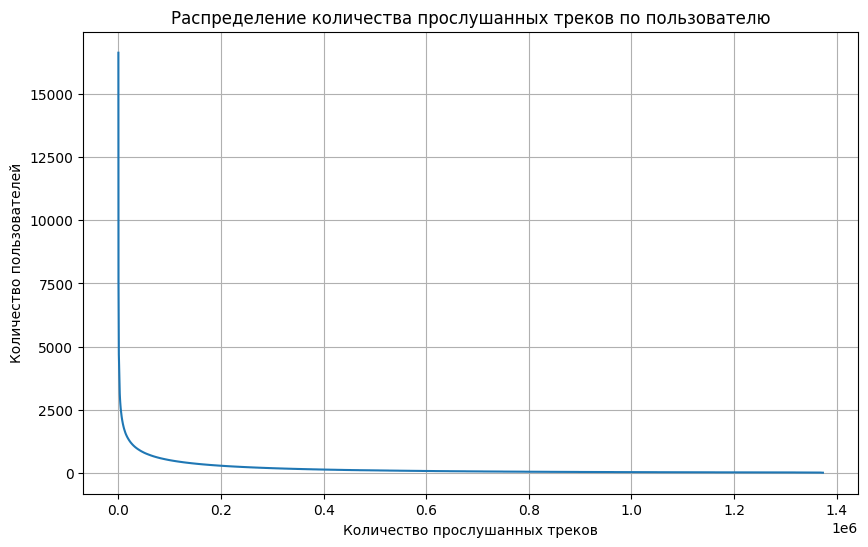

In [ ]:
# Построение графика распределения прослушанных треков на каждого пользователя по убыванию
plt.figure(figsize=(10, 6))
tracks_per_user['count'].plot()
plt.title('Распределение количества прослушанных треков по пользователю')
plt.xlabel('Количество прослушанных треков')
plt.ylabel('Количество пользователей')
plt.grid(True)
plt.show()

In [18]:
events.shape

(222629898, 4)

Приблизительное время расчета 1 мин.

In [19]:
# Из тренировочной выборки удалим аномально активных и аномально пассивынх пользователей
# зададим точку разбиения для формирования тренировочной выборки
train_test_global_time_split_date = pd.to_datetime("2022-12-16").date()
events['started_at'] = pd.to_datetime(events['started_at']).dt.date

train_test_global_time_split_idx = events["started_at"] < train_test_global_time_split_date
events_train = events[train_test_global_time_split_idx]
events_test = events[~train_test_global_time_split_idx]

# количество пользователей в train и test
users_train = events_train["user_id"].drop_duplicates()
users_test = events_test["user_id"].drop_duplicates()

# холодные пользователи (которые есть в test, но отсутствуют в train)
cold_users = users_test[~users_test.isin(users_train)]
len(cold_users)

30655

In [20]:
print ('Начальное количество пользователей:', len(tracks_per_user))
user_filtr = tracks_per_user[tracks_per_user['user_id'].isin(users_train)].copy()
print ('Начальное количество пользователей в тренировочной выборке:', len(user_filtr))
user_filtr = user_filtr[(user_filtr['count'] > 200) & (user_filtr['count'] < 4000)]['user_id']
print ('Количество пользователей в тренировочной выборке после фильтра:', len(user_filtr))
events = events[(events['user_id'].isin(user_filtr))|(events['user_id'].isin(cold_users))]
print ('Общее количество пользователей после фильтра', len(events['user_id'].unique()))

Начальное количество пользователей: 1373221
Начальное количество пользователей в тренировочной выборке: 1342566
Количество пользователей в тренировочной выборке после фильтра: 272349
Общее количество пользователей после фильтра 303004


In [21]:
events.shape

(153380010, 4)

In [22]:
del events_test
del events_train
del tracks_per_user
del train_test_global_time_split_idx
del users_test
del users_train


In [ ]:
# Обновим набор данных events
events.to_parquet('events.parquet', index=False)

In [ ]:
# Сохранение данных в файлы parquet
cold_users.to_csv('cold_users.csv', index=False)

2. Распределение количества прослушиваний каждого трека

In [23]:
# 1.1 Подсчет количества прослушиваний каждого трека и сортировка по убыванию
tracks_count = events.groupby('track_id').size().sort_values(ascending=False).reset_index(name='count')

In [24]:
print(tracks_count.describe())

           track_id          count
count  9.975270e+05  997527.000000
mean   3.686327e+07     153.760259
std    2.680077e+07     854.328103
min    2.600000e+01       1.000000
25%    1.543289e+07       6.000000
50%    3.457710e+07      13.000000
75%    5.693496e+07      46.000000
max    1.015218e+08   63914.000000


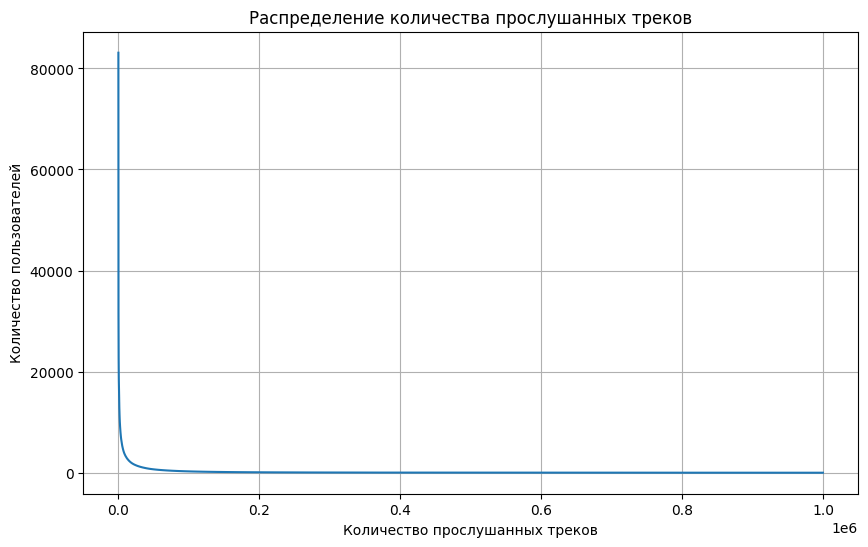

In [ ]:
# Построение графика распределения количества прослушанных треков
plt.figure(figsize=(10, 6))
tracks_count['count'].plot()
plt.title('Распределение количества прослушанных треков')
plt.xlabel('Количество прослушанных треков')
plt.ylabel('Количество пользователей')
plt.grid(True)
plt.show()

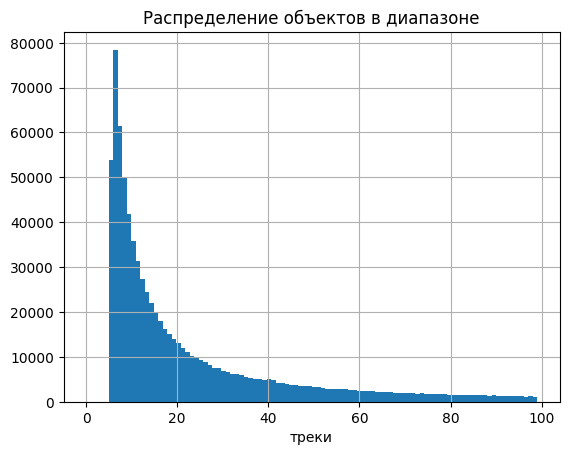

In [ ]:
tracks_count['count'].hist(bins=100, range=(0,99))
plt.title('Распределение объектов в диапазоне')
plt.xlabel('треки')
plt.show()

In [25]:
#  Удаление из events события для редких треков — таких, с которыми взаимодействовало менее 6 пользователей.

tracks_filtr = tracks_count[tracks_count['count'] >= 6]['track_id']
print ('Количество треков с минимальным взаимодействием:', len(tracks_count)-len(tracks_filtr) )

Количество треков с минимальным взаимодействием: 232617


In [26]:
events = events[events['track_id'].isin(tracks_filtr)]

In [27]:
items = items[items['track_id'].isin(tracks_filtr)]

3. Наиболее популярные треки

In [ ]:
# 3. Наиболее популярные треки
tracks_top = tracks_count.head(100).copy().merge(items, on='track_id', how='left')
tracks_top

,track_id,count,albums,artists,genres
0,53404,111062,"[4367, 89708, 294911, 294912, 294914, 297393, ...",[9262],"[13, 14, 102]"
1,33311009,106921,"[4440454, 4456609, 4482682, 4882996, 5072976, ...",[675068],"[14, 102]"
2,178529,101924,"[18113, 21924, 21940, 488052, 10009799]",[36800],"[41, 47]"
3,35505245,99490,"[4431303, 20559909]","[4611844, 588511]","[3, 75]"
4,65851540,86670,[10692414],[1554548],"[11, 20]"
...,...,...,...,...,...
95,3616433,51416,"[401455, 401456, 625175, 4418804, 10432824, 14...",[643850],[11]
96,628970,50262,"[67225, 67360, 67408, 73871, 225918, 3451024]",[184100],[13]
97,27032843,50189,"[3226543, 10792347, 21320853]",[31127],"[47, 308]"
98,9282507,49932,"[979404, 16409235]",[1462419],"[2, 102]"


In [ ]:
# Функция для добавления имен по id
def add_name(cell_val, col):
    if isinstance(cell_val, int):
        return catalog.loc[(catalog['type'] == col) & (catalog['id'] == cell_val), 'name'].values[0] if not catalog[(catalog['type'] == col) & (catalog['id'] == cell_val)].empty else None
    elif isinstance(cell_val, object):
        return [catalog.loc[(catalog['type'] == col) & (catalog['id'] == x), 'name'].values[0] for x in cell_val if not catalog[(catalog['type'] == col) & (catalog['id'] == x)].empty]
    else:
        return None

In [ ]:
# Применяем функцию к колонке genres
tracks_top['genre'] = tracks_top['genres'].apply(lambda x: add_name(x, 'genre'))

In [ ]:
# Применяем функцию к колонке artists
tracks_top['artist'] = tracks_top['artists'].apply(lambda x: add_name(x, 'artist'))

In [ ]:
# Применяем функцию к колонке albums
tracks_top['album'] = tracks_top['albums'].apply(lambda x: add_name(x, 'album'))

In [ ]:
tracks_top['title'] = tracks_top['track_id'].apply(lambda x: add_name(x, 'track'))

In [ ]:
tracks_top_name = tracks_top[['track_id','count','title','artist','album','genre']]
tracks_top_name

,track_id,count,title,artist,album,genre
0,53404,111062,Smells Like Teen Spirit,[Nirvana],"[Nevermind, Nirvana, Nevermind, Nevermind, Nev...","[alternative, rock, allrock]"
1,33311009,106921,Believer,[Imagine Dragons],"[Shape Of Pop, NOW That's What I Call Music, E...","[rock, allrock]"
2,178529,101924,Numb,[Linkin Park],"[Meteora, Meteora, Meteora, Meteora, 00s Rock ...","[numetal, metal]"
3,35505245,99490,I Got Love,"[Miyagi & Эндшпиль, Рем Дигга]","[I Got Love, I Got Love]","[rusrap, rap]"
4,65851540,86670,Юность,[Dabro],[Юность],"[pop, ruspop]"
...,...,...,...,...,...,...
95,3616433,51416,Summertime Sadness,[Lana Del Rey],"[Born To Die, Born To Die, Born To Die, Born T...",[pop]
96,628970,50262,I Hate Everything About You,[Three Days Grace],"[Three Days Grace, Three Days Grace, Three Day...",[alternative]
97,27032843,50189,Shut Your Mouth,[Pain],"[Nothing Remains The Same, Best Death Metal Ba...","[metal, industrial]"
98,9282507,49932,Родина,[АнимациЯ],"[Родина, Navigator Records 15]","[rusrock, allrock]"


4. Наиболее популярные жанры

In [28]:
# 4. Наиболее популярные жанры
tracks_count = tracks_count.copy().merge(items[['track_id','genres']], on='track_id', how='left')
tracks_count

,track_id,count,genres
0,53404,63914,"[13, 14, 102]"
1,178529,56929,"[41, 47]"
2,33311009,52038,"[14, 102]"
3,60292250,49238,[74]
4,6705392,48659,[13]
...,...,...,...
997522,6659474,1,NaN
997523,101478482,1,NaN
997524,79909370,1,NaN
997525,9079042,1,NaN


In [29]:
# Развернуть список жанров
tracks_count_exploded = tracks_count.explode('genres')

# Группировка по жанрам и вычисление суммы
genre_counts = tracks_count_exploded.groupby('genres')['count'].sum().reset_index()

# Переименование колонок для удобства
genre_counts = genre_counts.rename(columns={'genres': 'genre_id', 'count': 'total_count'})

# Сортировка по убыванию total_count
genre_counts = genre_counts.sort_values(by='total_count', ascending=False).reset_index(drop=True)
print ('Наиболее популярные жанры')
print(genre_counts)

Наиболее популярные жанры
     genre_id  total_count
0          11     35575945
1          75     26513777
2         102     21772488
3           3     17393975
4          20     16200792
..        ...          ...
168       166           42
169       106           28
170       148           26
171       124           18
172       150           18

[173 rows x 2 columns]


In [ ]:
genre_counts['genre'] = genre_counts['genre_id'].apply(lambda x: add_name(x, 'genre'))

In [ ]:
print(genre_counts)

     genre_id  total_count              genre
0          11     55578312                pop
1          75     37799821                rap
2         102     31092013            allrock
3          20     26626241             ruspop
4           3     25303695             rusrap
..        ...          ...                ...
168       166          207  unknown_genre_166
169       106           61       technologies
170       148           54  unknown_genre_148
171       150           30  unknown_genre_150
172       124           30  unknown_genre_124

[173 rows x 3 columns]


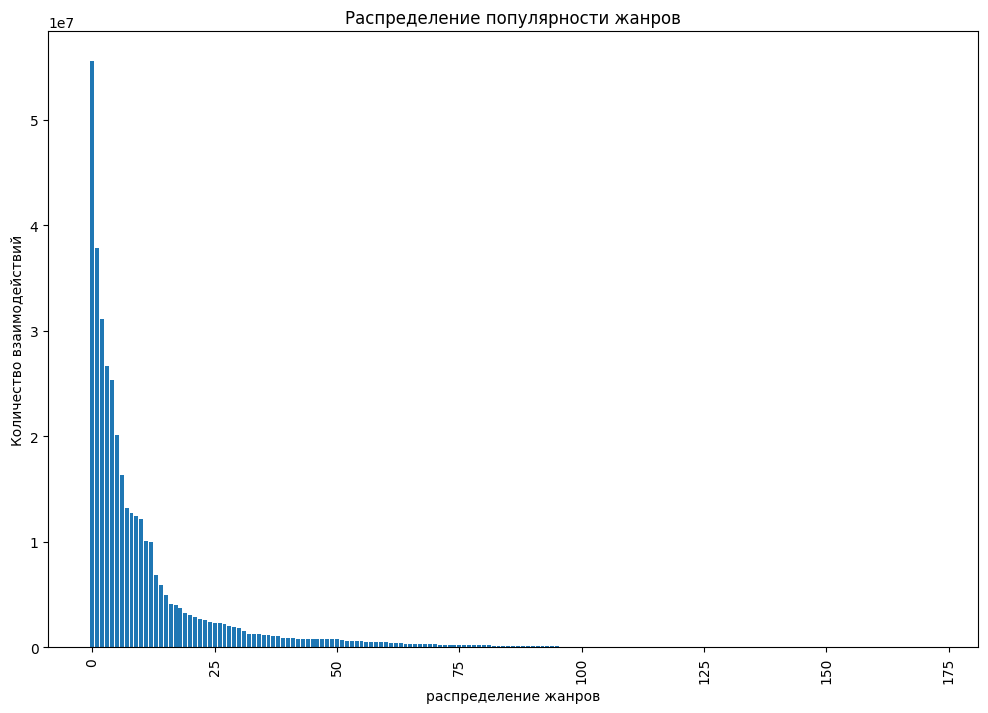

In [ ]:
plt.figure(figsize=(12, 8))
plt.bar(genre_counts.index, genre_counts['total_count'])
plt.xlabel('распределение жанров')
plt.ylabel('Количество взаимодействий')
plt.title('Распределение популярности жанров')
plt.xticks(rotation=90)
plt.show()

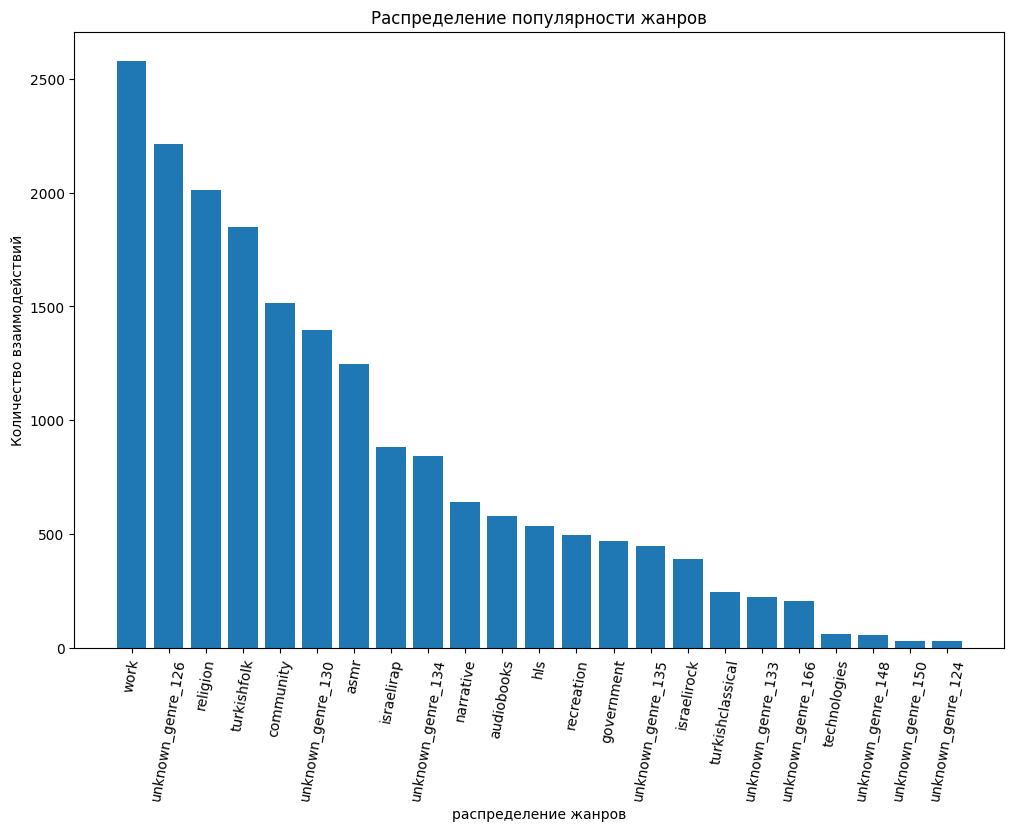

In [ ]:
plt.figure(figsize=(12, 8))
filtered_genre_counts = genre_counts.iloc[150:]
plt.bar(filtered_genre_counts.index, filtered_genre_counts['total_count'],tick_label=filtered_genre_counts['genre'])
plt.xlabel('распределение жанров')
plt.ylabel('Количество взаимодействий')
plt.title('Распределение популярности жанров')
plt.xticks(rotation=80)
plt.show()

In [30]:
# Проверим, все ли треки имеют жанр 
comb = items.explode('genres')
items[items['track_id'].isin(comb[comb['genres'].isnull()]['track_id'].unique())]

,track_id,albums,artists,genres
490,2520,"[249, 163801, 163802, 324616, 17542430, 189498...",[2259],[]
3069,16776,"[1479, 5319, 6093, 8467, 10641, 90867, 163801,...",[978],[]
3077,16801,"[1479, 163801, 9287549, 9377183, 9424994, 1201...",[10520],[]
4192,23752,"[2001, 3722, 4973, 6104, 6558, 23866, 37052, 7...",[13373],[]
6645,38012,"[3147, 60099, 530836, 1115289, 2490724, 818446...",[16758],[]
...,...,...,...,...
993942,97655426,[20154017],"[7258409, 11517158]",[]
996954,99134093,[20672017],[15727816],[]
997665,99412984,[20764543],[10029101],[]
997666,99412991,[20764550],[10029101],[]


5. Треки, которые никто не прослушал

In [31]:
# 5. Треки, которые никто не прослушал
all_tracks = set(items['track_id'])
listened_tracks = set(events['track_id'])
unlistened_tracks = all_tracks - listened_tracks
print(f"Треки, которые никто не прослушал: {len(unlistened_tracks)}")

Треки, которые никто не прослушал: 0


In [ ]:
items = items[~items['track_id'].isin(unlistened_tracks)]

In [32]:
items.shape

(764910, 4)

In [33]:
items = items.reset_index(drop=True)

In [ ]:
# Сохранение данных в файлы parquet
items.to_parquet('items.parquet', index=False)

Приблизительное время расчета 4 мин.

In [34]:
# Сортировка по столбцу started_at
events = events.sort_values(by='started_at')
# Сброс индекса
events = events.reset_index(drop=True)
# добавление прокси rating нового столбца с единицами
events['rating'] = 1

In [ ]:
events.to_parquet('events.parquet', index=False)

# Преобразование данных

⚠️ Расчет полного набора данных не представляется возможным без использования дополнительных средств, которые выходят за рамки данного учебного проекта, поэтому чтобы сократить набор данных до приемлемой величины с максимальным сохранением информативности целой выборки, прибегнем к кластеризации пользователей. После кластеризации извлечем 30% выборки пропорционально из каждого кластера.

In [35]:
# Добавление признака жанр к набору данных со взаимодействием
user_events_train = events[events['user_id'].isin(user_filtr)].merge(items[['track_id', 'genres']], on='track_id', how='left')
user_events_train.head()

,user_id,track_id,track_seq,started_at,rating,genres
0,1334428,2591,1,2022-01-01,1,"[11, 68, 128]"
1,726910,1721,1,2022-01-01,1,[11]
2,741779,12853,1,2022-01-01,1,[74]
3,741779,15675,2,2022-01-01,1,[11]
4,726910,2095,2,2022-01-01,1,[13]


In [ ]:
# Сохранение данных в файлы parquet
user_events_train.to_parquet('user_events_train.parquet', index=False)

⚠️ Ниже приведен алгоритм на Python по генерации новых признаков пользователей для последующей кластеризации, однако ограниченность ресурсов не позволяет провести данные вычисления, для обхода проблемы этот алгоритм был переписан на SQL запрос с прямым обращением к файлу user_events_train.parquet

In [ ]:
""""
# Преобразуем колонку 'started_at' в формат datetime, используя .loc для предотвращения предупреждений
user_events_train.loc[:, 'started_at'] = pd.to_datetime(user_events_train['started_at'])

# Создаем новую колонку, содержащую только дату, также используя .loc
user_events_train.loc[:, 'date'] = user_events_train['started_at'].dt.date

# Группируем данные по user_id и дате, затем считаем количество уникальных track_id за день
daily_unique_tracks = user_events_train.groupby(['user_id', 'date'])['track_id'].nunique().reset_index()

# Вычисляем максимальное и медианное количество уникальных track_id за день для каждого user_id
summary_user = daily_unique_tracks.groupby('user_id')['track_id'].agg(['max', 'median']).reset_index()
""""

In [ ]:
import duckdb
import pandas as pd

# Читаем файл parquet с помощью duckdb и выполняем SQL-запросы
con = duckdb.connect()

query = """
WITH user_events_with_date AS (
    SELECT
        user_id,
        track_id,
        started_at,
        CAST(started_at AS DATE) AS date
    FROM 'user_events_train.parquet'
),
daily_unique_tracks AS (
    SELECT
        user_id,
        date,
        COUNT(DISTINCT track_id) AS unique_tracks_per_day
    FROM
        user_events_with_date
    GROUP BY
        user_id,
        date
)
SELECT
    user_id,
    MAX(unique_tracks_per_day) AS max_unique_tracks,
    PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY unique_tracks_per_day) AS median_unique_tracks
FROM
    daily_unique_tracks
GROUP BY
    user_id;
"""

# Выполняем запрос и загружаем результат в DataFrame
summary_user = con.execute(query).fetchdf()

# Закрываем соединение
con.close()

In [ ]:
summary_user.head()

,user_id,max_unique_tracks,median_unique_tracks
0,16,13,5.0
1,22,6,1.0
2,26,8,3.0
3,52,7,2.0
4,67,4,1.0


In [ ]:
summary_user.to_parquet('summary_user.parquet', index=False)

In [ ]:
"""
# Преобразуем колонку started_at в datetime
user_events_train['started_at'] = pd.to_datetime(user_events_train['started_at'])

# Получаем уникальные жанры
unique_genres = sorted(set(genre for sublist in user_events_train['genres'] for genre in sublist))

# Создаем новые колонки для каждого уникального жанра и заполняем их
for genre in unique_genres:
    user_events_train[str(genre)] = user_events_train['genres'].apply(lambda x: 1 if genre in x else 0)

# Группируем данные по user_id
agg_dict = {str(genre): 'sum' for genre in unique_genres}
agg_dict.update({
    'started_at': ['nunique', 'min'],
    'track_id': 'nunique'
})

grouped = user_events_train.groupby('user_id').agg(agg_dict)

# Убираем многоуровневые индексы, оставляя в нименовании только верхний уровень для жанров
grouped.columns = [col[0] if col[0] in list(map(str, unique_genres)) else '_'.join(col).strip() for col in grouped.columns.values]

# Переименовываем колонки
grouped = grouped.rename(columns={
    'started_at_nunique': 'days',
    'track_id_nunique': 'tracks',
    'started_at_min': 'start_day'
})

# Вычисляем дополнительные колонки
grouped['avg'] = grouped['tracks'] / grouped['days']
end_day = pd.to_datetime('2022-12-31')
grouped['stability'] = grouped['days'] / ((end_day - grouped['start_day']).dt.days + 1)
"""

In [ ]:
import pandas as pd
catalog = pd.read_parquet("cat.parquet")

In [39]:
unique_genres = list(map(str, catalog[catalog['type'] == 'genre']['id'].tolist()))
unique_genres_with_prefix = [f"g_{genre}" for genre in unique_genres]

In [ ]:
del catalog

In [ ]:
import duckdb
import pandas as pd

# Читаем файл parquet с помощью duckdb и выполняем SQL-запросы
con = duckdb.connect()

# Создаем SQL-запрос
base_query = """
WITH user_events_with_date AS (
    SELECT
        user_id,
        track_id,
        started_at,
        CAST(genres AS VARCHAR) AS genres,
        CAST(started_at AS DATE) AS date
    FROM 'user_events_train.parquet'
)
"""

# Добавляем колонки для каждого жанра
genre_columns = ",\n".join(
    [f"SUM(CASE WHEN genres LIKE '%{genre[2:]}%' THEN 1 ELSE 0 END) AS {genre}" for genre in unique_genres_with_prefix]
)

full_query = f"""
{base_query},
grouped_user_events AS (
    SELECT
        user_id,
        {genre_columns},
        COUNT(DISTINCT started_at) AS started_at_nunique,
        MIN(started_at) AS started_at_min,
        COUNT(DISTINCT track_id) AS track_id_nunique
    FROM
        user_events_with_date
    GROUP BY
        user_id
)
SELECT
    user_id,
    {', '.join(unique_genres_with_prefix)},
    started_at_nunique,
    started_at_min,
    track_id_nunique
FROM
    grouped_user_events;
"""

# Выполняем запрос и загружаем результат в DataFrame
con = duckdb.connect()
summary_user_2 = con.execute(full_query).fetchdf()
con.close()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [ ]:
# Вычисляем дополнительные колонки
summary_user_2['avg'] = summary_user_2['track_id_nunique'] / summary_user_2['started_at_nunique']
end_day = pd.to_datetime('2022-12-31')
summary_user_2['stability'] = summary_user_2['started_at_nunique'] / ((end_day - summary_user_2['started_at_min']).dt.days + 1)

In [ ]:
summary_user_2.to_parquet('summary_user_2.parquet', index=False)

In [36]:
summary_user = pd.read_parquet("summary_user.parquet")
summary_user_2 = pd.read_parquet("summary_user_2.parquet")

In [37]:
# объединим таблицы
profile_user = summary_user_2.merge(summary_user, on='user_id', how='left')

Приблизительное время расчета 5 мин.

In [40]:
# Функция для расчета вариабельности
def calculate_variability(row, genres):
    non_zero_count = (row[genres] != 0).sum()
    return non_zero_count / len(genres)

# Функция для расчета волатильности
def calculate_volatility(row, genres):
    return row[genres].std()

# Применение функций к датафрейму
profile_user['variability'] = profile_user.apply(calculate_variability, genres=unique_genres_with_prefix, axis=1)
profile_user['volatility'] = profile_user.apply(calculate_volatility, genres=unique_genres_with_prefix, axis=1)

In [42]:
# Удаление технических колонок
profile_user = profile_user.drop(columns=["started_at_min", "track_id_nunique","started_at_nunique"])
# Удаление колонок жанра
profile_user.drop(columns=unique_genres_with_prefix, inplace=True)

In [43]:
profile_user

,user_id,avg,stability,max_unique_tracks,median_unique_tracks,variability,volatility
0,27874,5.600760,0.988722,13,5.0,0.530612,122.983374
1,27898,4.322034,0.983333,12,4.0,0.295918,20.346416
2,27905,3.714286,0.587413,9,3.5,0.234694,35.474891
3,27930,8.011236,0.994413,17,8.0,0.387755,130.693525
4,27931,3.143678,0.945652,10,3.0,0.362245,39.258651
...,...,...,...,...,...,...,...
272344,1372313,7.982759,0.637363,18,8.0,0.112245,56.428779
272345,1372331,2.287129,0.765152,6,2.0,0.290816,16.274994
272346,1372332,9.100503,0.805668,17,9.0,0.433673,129.112567
272347,1372381,4.017964,0.547541,10,4.0,0.275510,59.538123


In [44]:
del summary_user
del summary_user_2

In [ ]:
profile_user.to_parquet('profile_user.parquet', index=False)

In [45]:
import pandas as pd
profile_user = pd.read_parquet("profile_user.parquet")

In [56]:
from sklearn.preprocessing import StandardScaler
# Выбор признаков для кластеризации
features = profile_user[['avg','stability','max_unique_tracks','median_unique_tracks','variability','volatility']]

# Нормализация данных
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

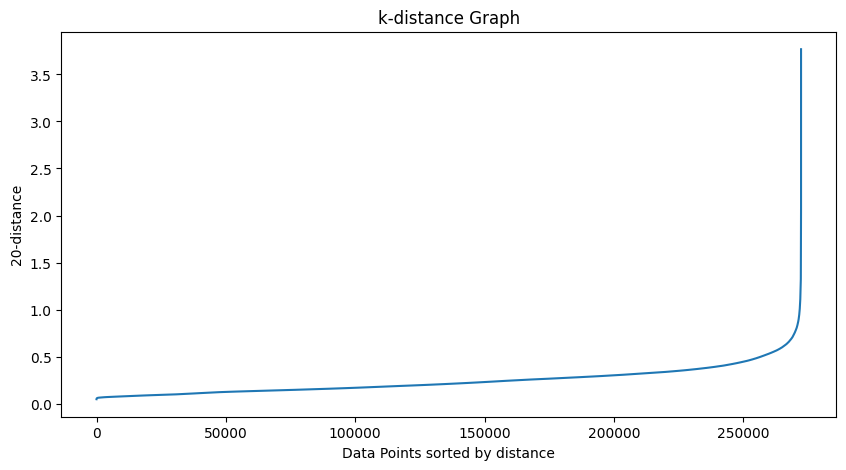

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Определение k-distance графика
k = 20
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors = nearest_neighbors.fit(scaled_features)
distances, indices = neighbors.kneighbors(scaled_features)

# Построение k-distance графика
distances = np.sort(distances[:, k-1], axis=0)
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title('k-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel(f'{k}-distance')
plt.show()

In [ ]:
del features
del profile_user

⚠️ Ограничение ресурсов не позволило в данной работе использовать возможности кластеризации DBSCAN. Однако, при достаточной мощности вы можете провести расчет и использовать вычисления для более тонкой кластеризации. Код учитывает этот сценарий далее.

In [ ]:
from sklearn.cluster import DBSCAN

# Применение DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=12)  # eps и min_samples могут быть настроены
clusters = dbscan.fit_predict(scaled_features)

: 

In [ ]:
# Добавление столбца с кластерами в DataFrame
profile_user['cl_db'] = clusters

# Визуализация результатов (для первых двух признаков)
plt.figure(figsize=(10, 5))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=clusters, cmap='plasma')
plt.title('DBSCAN Кластеризация')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Подсчет количества объектов в каждом кластере
unique, counts = np.unique(clusters, return_counts=True)
print(dict(zip(unique, counts)))

# Смотрю сколько точек не было отнесено ни к одному кластеру:
noise_mask = profile_user['cl_db'] == -1
noise_points = profile_user[noise_mask]
noise_points

In [ ]:
from sklearn.cluster import KMeans

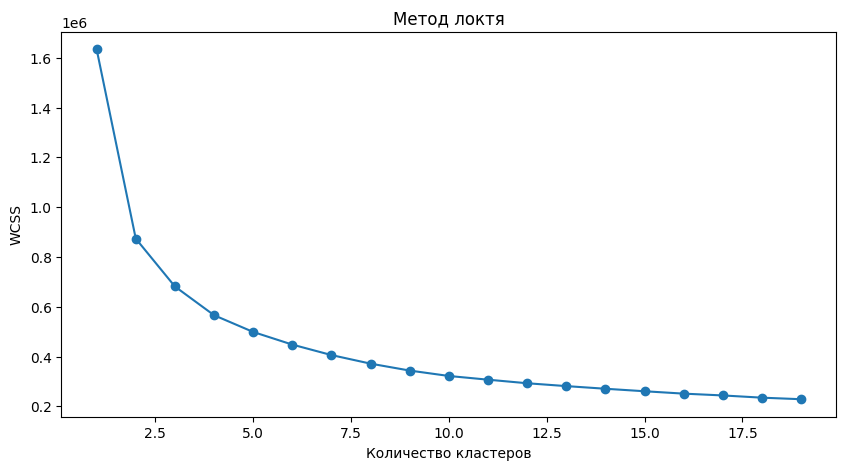

In [ ]:
# Определение оптимального количества кластеров с использованием метода локтя
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Построение графика метода локтя
plt.figure(figsize=(10, 5))
plt.plot(range(1, 20), wcss, marker='o')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()

In [ ]:

# Обучение модели K-Means с оптимальным количеством кластеров
optimal_clusters = 10  # оптимальное количество кластеров, определенное из графика
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Добавление столбца с кластерами в DataFrame
profile_user['cl_km'] = clusters

cl_km
0    0.162784
5    0.159373
6    0.157416
2    0.140199
7    0.107102
1    0.091317
3    0.075414
9    0.054371
8    0.032521
4    0.019504
Name: proportion, dtype: float64


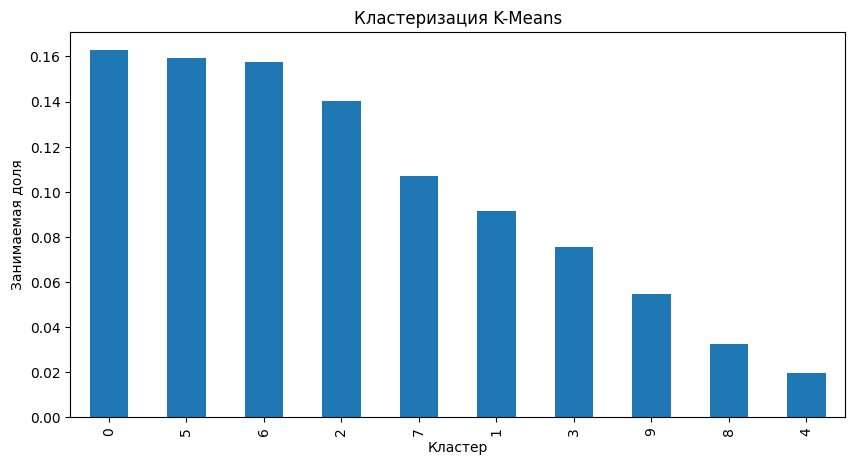

In [ ]:
# Подсчет долей значений в столбце 'cluster'
cluster_proportions = profile_user['cl_km'].value_counts(normalize=True)

# Вывод пропорций
print(cluster_proportions)

# Визуализация пропорций в виде графика
cluster_proportions.plot(kind='bar', figsize=(10, 5), title='Кластеризация K-Means')
plt.xlabel('Кластер')
plt.ylabel('Занимаемая доля')
plt.show()

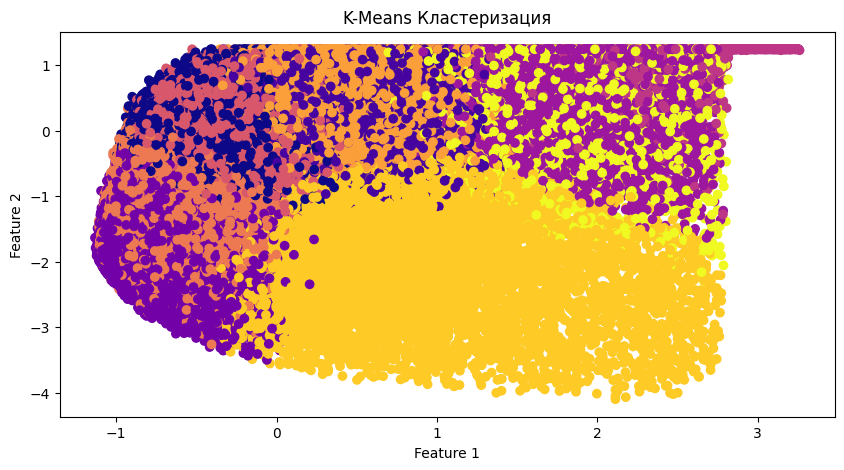

{0: 44334, 1: 24870, 2: 38183, 3: 20539, 4: 5312, 5: 43405, 6: 42872, 7: 29169, 8: 8857, 9: 14808}


In [ ]:
# Визуализация результатов (для первых двух признаков)
plt.figure(figsize=(10, 5))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=clusters, cmap='plasma')
plt.title('K-Means Кластеризация')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Подсчет количества объектов в каждом кластере
unique, counts = np.unique(clusters, return_counts=True)
print(dict(zip(unique, counts)))

⚠️ Далее приведен вариант коллаборации кластеров DBSCAN и K-Means, к сожалению, данные успешного расчета DBSCAN-кластеризации были утрачены, повторить расчет не удалось, сохранился только график и алгоритм. Далее в расчетах используется только результат K-Means кластеризации.

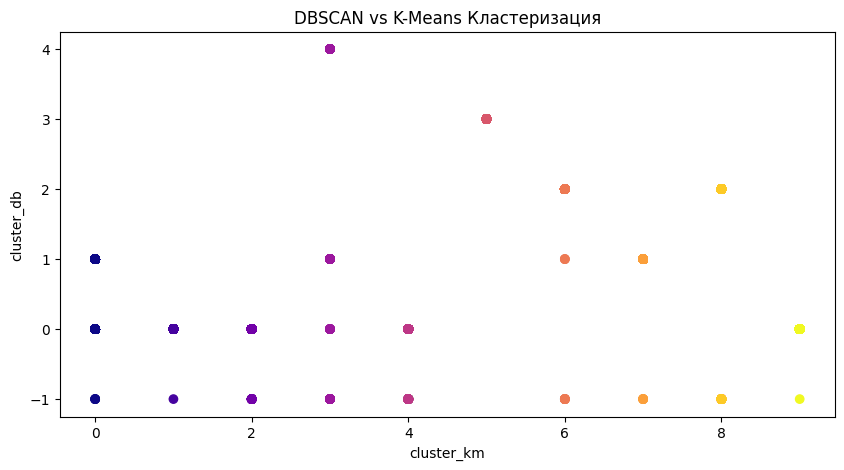

In [ ]:
"""
# Визуализация результатов (для первых двух признаков)
plt.figure(figsize=(10, 5))
plt.scatter(profile_user['cl_km'], profile_user['cl_db'], c=clusters, cmap='plasma')
plt.title('DBSCAN vs K-Means Кластеризация')
plt.xlabel('cluster K-Means')
plt.ylabel('cluster DBSCAN')
plt.show()
"""

In [ ]:
"""
# распределение кластеров DBSCAN "-1" и "4" по ближайшим кластерам
profile_user[(profile_user['cl_db'] == -1)&(profile_user['cl_km'] < 5)] = 0
profile_user[(profile_user['cl_db'] == -1)&(profile_user['cl_km'] == 6)] = 1
profile_user[(profile_user['cl_db'] == -1)&(profile_user['cl_km'] == 7)] = 1
profile_user[(profile_user['cl_db'] == -1)&(profile_user['cl_km'] == 8)] = 2
profile_user[(profile_user['cl_db'] == -1)&(profile_user['cl_km'] == 9)] = 0
profile_user[(profile_user['cl_db'] == 4)&(profile_user['cl_km'] == 3)] = 1
# объединение кластерных признаков в один общий признак
profile_user['cluster'] = 10*profile_user['cl_db']+profile_user['cl_km']
"""

In [ ]:
# Функция для выборки доли элементов из каждого кластера
def sample_clusters(df, cluster_col, sample_fraction):
    sampled_df = pd.DataFrame()
    for cluster in df[cluster_col].unique():
        cluster_data = df[df[cluster_col] == cluster]
        sampled_data = cluster_data.sample(frac=sample_fraction, random_state=42)
        sampled_df = pd.concat([sampled_df, sampled_data])
    return sampled_df

In [ ]:
# Применение функции для выборки 30% строк
sample_fraction = 0.3  # 30% оставляем
sampled_user_train = sample_clusters(profile_user[['user_id', 'cl_km']], 'cl_km', sample_fraction)

# Проверка результатов
print(sampled_user_train.shape, sampled_user_train['cl_km'].value_counts(normalize=True))
print(profile_user.shape, profile_user['cl_km'].value_counts(normalize=True))

(81706, 2) cl_km
0    0.162779
5    0.159376
6    0.157418
2    0.140198
7    0.107104
1    0.091315
3    0.075417
9    0.054366
8    0.032519
4    0.019509
Name: proportion, dtype: float64
(272349, 8) cl_km
0    0.162784
5    0.159373
6    0.157416
2    0.140199
7    0.107102
1    0.091317
3    0.075414
9    0.054371
8    0.032521
4    0.019504
Name: proportion, dtype: float64


In [ ]:
sampled_user_train.to_parquet('sampled_user_train.parquet', index=False)

In [ ]:
cold_users = pd.read_csv('cold_users.csv')

In [ ]:
sampled_user = pd.concat([sampled_user_train['user_id'], cold_users['user_id']]).reset_index(drop=True)


In [ ]:
sampled_user

0          123538
1          463276
2          639018
3         1317229
4         1150384
           ...   
112356    1374322
112357    1374493
112358    1374500
112359    1374547
112360    1374574
Name: user_id, Length: 112361, dtype: int64

In [ ]:
print (sampled_user_train.shape)
print (cold_users.shape)
print (sampled_user.shape)

(81706, 2)
(30655, 1)
(112361,)


In [ ]:
sampled_user.to_csv('sampled_user.csv', index=False)

# Очистка памяти

Здесь, может понадобится очистка памяти для высвобождения ресурсов для выполнения кода ниже. 

следует перезапустить kernel.

# === ЭТАП 3 ===

# Загрузка данных

In [1]:
import pandas as pd

In [2]:
events = pd.read_parquet("events.parquet")
sampled_user = pd.read_csv("sampled_user.csv")

In [3]:
# Выборка по фракции
events_frac = events[events['user_id'].isin(sampled_user)]

In [4]:
del events

In [61]:
# Сброс индекса
events_frac = events_frac.reset_index(drop=True)
# сохранение
events_frac.to_parquet('events_frac.parquet', index=False)

In [3]:
events_frac = pd.read_parquet("events_frac.parquet")

In [7]:
items = pd.read_parquet("items.parquet")

In [8]:
# Треки, которые не попали в выборку
all_tracks = set(items['track_id'])
listened_tracks = set(events_frac['track_id'])
unlistened_tracks = all_tracks - listened_tracks
print(f"Треки, которые никто не прослушал: {len(unlistened_tracks)}")

Треки, которые никто не прослушал: 16768


In [5]:
items = items[~items['track_id'].isin(unlistened_tracks)]
# Сброс индекса
items = items.reset_index(drop=True)
print (items.shape)
# сохранение
items.to_parquet('items_frac.parquet', index=False)

(748142, 4)


In [2]:
items = pd.read_parquet("items_frac.parquet")

# Разбиение данных

Разбиваем данные на тренировочную, тестовую выборки.

In [10]:
# зададим точку разбиения
train_test_global_time_split_date = pd.to_datetime("2022-12-16").date()
events_frac['started_at'] = pd.to_datetime(events_frac['started_at']).dt.date

# Split the data into train and test sets
train_test_global_time_split_idx = events_frac["started_at"] < train_test_global_time_split_date
events_train = events_frac[train_test_global_time_split_idx]
events_test = events_frac[~train_test_global_time_split_idx]

# количество пользователей в train и test
users_train = events_train["user_id"].drop_duplicates()
users_test = events_test["user_id"].drop_duplicates()

print(len(users_train), len(users_test))

81706 79747


In [ ]:
events_train.to_parquet('events_frac_train.parquet', index=False)
events_test.to_parquet('events_frac_test.parquet', index=False)

In [11]:
# холодные пользователи (которые есть в test, но отсутствуют в train)
cold_users = users_test[~users_test.isin(users_train)]
print(len(cold_users)) 

30625


In [4]:
events_train = pd.read_parquet("events_frac_train.parquet")

In [5]:
events_test = pd.read_parquet("events_frac_test.parquet")

In [6]:
catalog = pd.read_parquet("cat.parquet")

# Топ популярных

Рассчитаем рекомендации как топ популярных.

In [13]:
# топ-100 наиболее популярных треков с 2022-11-01
top_pop_start_date = pd.to_datetime("2022-11-01").date()

top_time_split_idx = events_train["started_at"] < top_pop_start_date
top_events_train = events_train[~top_time_split_idx]

top_events_train

,user_id,track_id,track_seq,started_at,rating
33324307,917246,88558708,177,2022-11-01,1
33324308,1221086,65012287,564,2022-11-01,1
33324309,917246,88476064,176,2022-11-01,1
33324310,1221086,65013969,565,2022-11-01,1
33324311,46059,57502030,398,2022-11-01,1
...,...,...,...,...,...
43297575,11331,51677900,948,2022-12-15,1
43297576,1095844,51183799,106,2022-12-15,1
43297577,1289638,66207528,221,2022-12-15,1
43297578,788103,85748557,359,2022-12-15,1


In [68]:
# Подсчет количества прослушиваний для каждого трека и сортировка по убыванию
top_tracks_count = top_events_train.groupby('track_id').size().sort_values(ascending=False).reset_index(name='count')

In [69]:
top_tracks_count

,track_id,count
0,60292250,6010
1,75944934,5133
2,65851540,5048
3,78426489,4912
4,84382282,4900
...,...,...
515449,62348012,1
515450,62348639,1
515451,62349198,1
515452,62349915,1


In [70]:
top_tracks = top_tracks_count.head(100).copy().merge(items, on='track_id', how='left')
# топ-100 наиболее популярных треков с 2022-11-01
top_tracks

,track_id,count,albums,artists,genres
0,60292250,6010,"[9300859, 10203027, 10203029, 10218120, 102182...",[611169],[74]
1,75944934,5133,"[13386870, 17997180]",[5535139],"[44, 75]"
2,65851540,5048,[10692414],[1554548],"[11, 20]"
3,78426489,4912,"[14019365, 16267120]",[816919],[16]
4,84382282,4900,[15985737],"[5056591, 2938031]","[3, 75]"
...,...,...,...,...,...
95,69096002,2372,[11522234],[155946],"[11, 20]"
96,67538121,2371,[11107121],[5129397],"[3, 75]"
97,75385809,2353,[13240353],[7107429],"[11, 20]"
98,80467880,2335,[14743336],[6841371],"[11, 20]"


In [71]:
# Объедините event_test с top_tracks, чтобы получить рекомендации для холодных пользователей
cold_users_events_with_recs = events_test[events_test["user_id"].isin(cold_users)].merge(top_tracks[['track_id','count']], on="track_id", how="left")

In [72]:
cold_user_items_no_avg_rating_idx = cold_users_events_with_recs["count"].isnull()
cold_user_recs = cold_users_events_with_recs[~cold_user_items_no_avg_rating_idx][["user_id", "track_id", "track_seq", "count"]]

# Проверьте количество строк, чтобы убедиться, что оно осталось прежним
original_row_count = len(events_test[events_test["user_id"].isin(cold_users)])
current_row_count = len(cold_users_events_with_recs)

# Проверяем, одинаково ли количество строк
original_row_count, current_row_count

(1091718, 1091718)

In [73]:
proportion_matched_recs = (len(cold_user_items_no_avg_rating_idx) - len(cold_user_recs)) / len(cold_user_items_no_avg_rating_idx)
proportion_matched_recs_rounded = round(proportion_matched_recs, 4)
proportion_matched_recs_rounded

0.9586

In [74]:
# посчитаем покрытие холодных пользователей рекомендациями

cold_users_hit_ratio = cold_users_events_with_recs.groupby("user_id").agg(hits=("count", lambda x: (~x.isnull()).mean()))

print(f"Доля пользователей без релевантных рекомендаций: {(cold_users_hit_ratio == 0).mean().iat[0]:.2f}")
print(f"Среднее покрытие пользователей: {cold_users_hit_ratio[cold_users_hit_ratio != 0].mean().iat[0]:.2f}")

Доля пользователей без релевантных рекомендаций: 0.58
Среднее покрытие пользователей: 0.11


In [75]:
top_tracks.to_parquet('top_popular.parquet', index=False)

# Персональные

Рассчитаем персональные рекомендации.

In [20]:
import pandas as pd
import sklearn.preprocessing

# Перекодируем идентификаторы пользователей 
# из имеющихся в последовательность 0, 1, 2, ...
user_encoder = sklearn.preprocessing.LabelEncoder()
user_encoder.fit(events_frac["user_id"])
events_train.loc[:, "user_id_enc"] = user_encoder.transform(events_train["user_id"])
events_test.loc[:, "user_id_enc"] = user_encoder.transform(events_test["user_id"])

# Перекодируем идентификаторы объектов: 
# из имеющихся в последовательность 0, 1, 2, ...
item_encoder = sklearn.preprocessing.LabelEncoder()
item_encoder.fit(items["track_id"])
items.loc[:, "item_id_enc"] = item_encoder.transform(items["track_id"])

events_train.loc[:, "item_id_enc"] = item_encoder.transform(events_train["track_id"])
events_test.loc[:, "item_id_enc"] = item_encoder.transform(events_test["track_id"])

In [21]:
events_train['item_id_enc'].max()

748141

In [22]:
# Определяем количество уникальных пользователей и объектов в тренировочном наборе данных
num_users = events_train["user_id_enc"].nunique()
num_items = events_train["item_id_enc"].nunique()

# Вычисляем размер матрицы user_item_matrix_train в гигабайтах
matrix_size_bytes = num_users * num_items
matrix_size_gb = matrix_size_bytes / (1024 ** 3)

# Отбрасываем дробную часть
matrix_size_gb_int = int(matrix_size_gb)

matrix_size_gb

56.31734037399292

⚠️ Во избежание проблем с производительностью, связанной с библиотекой OpenBLAS, рекомендуется установка переменной окружения OPENBLAS_NUM_THREADS=1. OpenBLAS использует свою внутреннюю систему потоков, что может вызвать проблемы с производительностью при выполнении модели ALS. Выполнение рекомендации позволит также немного сократить время расчета. Убедитесь, что переменная окружения установлена до импорта любых библиотек, которые могут использовать OpenBLAS

In [23]:
# Установить переменную окружения:
import os
os.environ['OPENBLAS_NUM_THREADS'] = '1'

import scipy
import numpy as np

# создаём sparse-матрицу формата CSR 
user_item_matrix_train = scipy.sparse.csr_matrix((
    events_train["rating"],
    (events_train['user_id_enc'], events_train['item_id_enc'])),
    dtype=np.int8)

⏳ Приблизительное время расчета модели 6,5 мин.

In [24]:
from implicit.als import AlternatingLeastSquares

als_model = AlternatingLeastSquares(factors=20, iterations=20, regularization=0.05, random_state=0)
als_model.fit(user_item_matrix_train)

/home/mle-user/mle_projects/mle-project-sprint-2-v001/.venv_project_name/lib/python3.10/site-packages/implicit/cpu/als.py:95: RuntimeWarning: OpenBLAS is configured to use 4 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'OPENBLAS_NUM_THREADS=1' or by calling 'threadpoolctl.threadpool_limits(1, "blas")'. Having OpenBLAS use a threadpool can lead to severe performance issues here.
  check_blas_config()


  0%|          | 0/20 [00:00<?, ?it/s]

In [25]:
def get_recommendations_als(user_item_matrix, model, user_id, user_encoder, item_encoder, include_seen=True, n=5):
    """
    Возвращает отранжированные рекомендации для заданного пользователя
    """
    user_id_enc = user_encoder.transform([user_id])[0]
    recommendations = model.recommend(
         user_id_enc, 
         user_item_matrix[user_id_enc], 
         filter_already_liked_items=not include_seen,
         N=n)
    recommendations = pd.DataFrame({"item_id_enc": recommendations[0], "score": recommendations[1]})
    recommendations["track_id"] = item_encoder.inverse_transform(recommendations["item_id_enc"])
    
    return recommendations

In [26]:
# Выбор произвольного пользователя из тренировочной выборки
user_id = events_train['user_id'].sample().iat[0]

print(f"user_id: {user_id}")

print("История (последние события, recent)")
user_history = (
    events_train
    .query("user_id == @user_id")
    .merge(items.set_index("track_id")[["albums", "artists", "genres"]], on="track_id")
)
user_history_to_print = user_history[["track_id", "albums", "artists", "rating", "genres"]].tail(10)
display(user_history_to_print)

print("Рекомендации")
user_recommendations = get_recommendations_als(user_item_matrix_train, als_model, user_id, user_encoder, item_encoder, include_seen=False, n=100)
user_recommendations = user_recommendations.merge(items, on="track_id")
user_recommendations["match"] = user_recommendations["track_id"].isin(user_history["track_id"])
display(user_recommendations.head(10))

user_id: 626829
История (последние события, recent)


,track_id,albums,artists,rating,genres
206,81536088,[15103722],[5732328],1,[25]
207,81536114,[15103722],"[5732328, 11525189]",1,[25]
208,81581092,[15119986],[1266054],1,[68]
209,81536118,[15103722],[5732328],1,[25]
210,82239893,[15340244],[11239792],1,[68]
211,82412504,[15388820],"[161247, 4331814]",1,"[11, 20]"
212,82690991,[15482784],[11748526],1,[68]
213,82822385,[15521679],[1266054],1,[68]
214,83063895,[15598104],[5129397],1,"[11, 20]"
215,82899493,[15545082],[12753584],1,"[2, 102]"


Рекомендации


,item_id_enc_x,score,track_id,albums,artists,genres,item_id_enc_y,match
0,523488,0.260923,52380688,[7373129],[4944372],"[11, 20]",523488,False
1,465151,0.225438,44184116,[5916387],[6125147],"[11, 20]",465151,False
2,417310,0.220819,39257277,"[5060813, 5415170, 7303088, 9083867, 9806852, ...","[3018605, 191634]",[16],417310,False
3,502834,0.214639,49961817,"[6876308, 7175206, 7175214]","[666984, 4752463]","[11, 20]",502834,False
4,549702,0.211543,56204557,"[8302547, 8501194, 9139533, 9489358, 9521017, ...",[7847834],[11],549702,False
5,621117,0.210994,66869588,[10939867],"[4331814, 4944372]","[11, 20]",621117,False
6,475375,0.203337,45499814,"[6109461, 7094821, 7152451, 7170954, 7285586, ...",[5007577],"[11, 20]",475375,False
7,643148,0.203050,70619465,[11945528],"[4330960, 4944372]","[11, 20]",643148,False
8,559292,0.201504,57921154,[8750133],[257461],"[11, 20]",559292,False
9,563492,0.199569,58515506,[8888364],[6229247],"[11, 20]",563492,False


In [27]:
# Получаем список всех возможных user_id (перекодированных)
user_ids_encoded = np.arange(user_item_matrix_train.shape[0])

In [28]:
# Проверяем размер матрицы и корректность индексов
print(f"Shape of user_item_matrix_train: {user_item_matrix_train.shape}")
print(f"Max user_id_enc: {user_ids_encoded.max()}")

Shape of user_item_matrix_train: (112330, 748142)
Max user_id_enc: 112329


⚠️ Вызовы .recommend, .similar_itemsи и .similar_users имеют возможность генерировать пакеты рекомендаций - в дополнение к простому вычислению одного элемента. Это, как правило, намного эффективнее, чем вызывать поэлементно в цикле, так как пакетный вызов подерживает многопоточность вычислений на ЦП и ГП.

⏳ Приблизительное время расчета 2,7 мин.

In [29]:
# получаем рекомендации для всех пользователей пакетным вызовом
als_recommendations = als_model.recommend(
    user_ids_encoded, 
    user_item_matrix_train[user_ids_encoded], 
    filter_already_liked_items=False, N=100)

In [30]:
# преобразуем полученные рекомендации в табличный формат
item_ids_enc = als_recommendations[0]
als_scores = als_recommendations[1]

als_recommendations = pd.DataFrame({
    "user_id_enc": user_ids_encoded,
    "item_id_enc": item_ids_enc.tolist(), 
    "score": als_scores.tolist()})
als_recommendations = als_recommendations.explode(["item_id_enc", "score"], ignore_index=True)

# приводим типы данных
als_recommendations["item_id_enc"] = als_recommendations["item_id_enc"].astype("int")
als_recommendations["score"] = als_recommendations["score"].astype("float")

# получаем изначальные идентификаторы
als_recommendations["user_id"] = user_encoder.inverse_transform(als_recommendations["user_id_enc"])
als_recommendations["track_id"] = item_encoder.inverse_transform(als_recommendations["item_id_enc"])
# Удаляем закодированные столбцы и переупорядочиваем столбцы
als_recommendations = als_recommendations.drop(columns=["user_id_enc", "item_id_enc"])
als_recommendations = als_recommendations[["user_id", "track_id", "score"]]

In [31]:
als_recommendations

,user_id,track_id,score
0,4,18820599,0.164170
1,4,6705392,0.162263
2,4,694683,0.153288
3,4,647040,0.147865
4,4,1710810,0.146654
...,...,...,...
11232995,1374550,43119,0.385866
11232996,1374550,41048435,0.384418
11232997,1374550,33273,0.384326
11232998,1374550,45641,0.383104


In [32]:
als_recommendations.to_parquet("personal_als.parquet")

In [32]:
# Сравним полученные рекомендации с рекомендацией для одиночного пользователя, найденной выше
als_recommendations[als_recommendations['user_id']==user_id].head(10)

,user_id,track_id,score
5142900,626829,65851540,0.264796
5142901,626829,52380688,0.260923
5142902,626829,44184116,0.225438
5142903,626829,39257277,0.220819
5142904,626829,61565558,0.217198
5142905,626829,49961817,0.214639
5142906,626829,56204557,0.211543
5142907,626829,66869588,0.210994
5142908,626829,62244864,0.208704
5142909,626829,50821247,0.207088


# Похожие

Рассчитаем похожие, они позже пригодятся для онлайн-рекомендаций.

⚠️ Для фильтрации больших массивов данных рекомендуется использовать логическое индексирование — это более быстрый и эффективный способ. Альтернативный способ фильтрации с использованием метода .query() включает анализ строки и последующую оценку ее как логического массива, что может быть медленным для больших DataFrames.
- real_tracks_test = events_test[(events_test['track_id'] == example_track_id)]
- real_tracks_test = events_test.query("track_id == @example_track_id")


In [33]:
# Функция для получения похожих треков
def get_similar_tracks(model, item_id, item_encoder, n=10):
    item_id_enc = item_encoder.transform([item_id])[0]
    sim_items = model.similar_items(item_id_enc, N=n)
    sim_items = pd.DataFrame({"item_id_enc": sim_items[0], "score": sim_items[1]})
    # Обратное преобразование кодированных значений в оригинальные идентификаторы
    sim_items["track_id"] = item_encoder.inverse_transform(sim_items["item_id_enc"])
    
    return sim_items

# Выбираем произвольный трек для примера
example_track_id = items['track_id'].sample().iat[0]
print(f"Запрошенный трек: {example_track_id}")

# Получаем похожие треки
sim_tracks = get_similar_tracks(als_model, example_track_id, item_encoder, n=10)
print("Похожие треки:")
display(sim_tracks)

# Сравниваем с реальными данными
print("Поиск пользователей, изначально послушавших начальный трек и позднее треки из списка похожих:")
# Удаляем запрошенный трек из списка похожих
sim_tracks = sim_tracks[sim_tracks['track_id'] != example_track_id]
# Найдем всех пользователей, кто слушал запрошенный трек
users_example_track = events_frac[(events_frac['track_id'] == example_track_id)][['user_id', 'track_seq']]
# Найдем взаимодействия найденных пользователей со списком похожих треков
users_similar_tracks = events_frac[(events_frac['user_id'].isin(users_example_track['user_id']))&(events_frac['track_id'].isin(sim_tracks['track_id']))]
# Добавим колонку очередности прослушивания запрошенного трека
users_similar_tracks = users_similar_tracks.merge(users_example_track, on="user_id")
# Удаляем и переупорядочиваем столбцы
users_similar_tracks = users_similar_tracks[["user_id", "track_seq_y", "track_id", "track_seq_x", "started_at"]]
# Фильтруем в выдаче чтобы очередность прослушивания запрошенного трека была раньше похожих треков
display(users_similar_tracks[users_similar_tracks['track_seq_x']>users_similar_tracks['track_seq_y']])

Запрошенный трек: 50451055
Похожие треки:


,item_id_enc,score,track_id
0,506529,1.000000,50451050
1,506534,1.000000,50451055
2,506535,0.987243,50451056
3,506532,0.987243,50451053
4,506510,0.979270,50451019
5,506523,0.977684,50451039
6,666563,0.976329,74369274
7,619691,0.975534,66613495
8,638890,0.974271,69835667
9,657073,0.973552,72790215


Поиск пользователей, изначально послушавших начальный трек и позднее треки из списка похожих:


,user_id,track_seq_y,track_id,track_seq_x,started_at
4,277609,158,50451056,159,2022-09-03
5,277609,158,66613495,330,2022-11-16
6,277609,158,72790215,397,2022-12-15
8,1007781,135,66613495,233,2022-12-15
9,181029,171,50451056,172,2022-09-24
12,181029,171,72790215,297,2022-11-27
15,776727,88,50451056,89,2022-11-12


⏳ Приблизительное время расчета 23,5 мин.

In [34]:
# Получаем список всех треков
item_ids_encoded = range(len(item_encoder.classes_))

# пакетом получаем похожие треки для всех треков
similar_items = als_model.similar_items(item_ids_encoded, N=10)

In [35]:
# преобразуем полученные рекомендации в табличный формат
item_ids_enc = similar_items[0]
als_scores = similar_items[1]

similar_items_df = pd.DataFrame({
    "item_id_req_enc": item_ids_encoded,
    "item_id_enc": item_ids_enc.tolist(), 
    "score": als_scores.tolist()})
similar_items_df = similar_items_df.explode(["item_id_enc", "score"], ignore_index=True)

# приводим типы данных
similar_items_df["item_id_enc"] = similar_items_df["item_id_enc"].astype("int")
similar_items_df["score"] = similar_items_df["score"].astype("float")
# получаем изначальные идентификаторы
similar_items_df["item_id"] = item_encoder.inverse_transform(similar_items_df["item_id_req_enc"])
similar_items_df["track_id"] = item_encoder.inverse_transform(similar_items_df["item_id_enc"])
# Удаляем закодированные столбцы и переупорядочиваем столбцы
similar_items_df = similar_items_df.drop(columns=["item_id_req_enc", "item_id_enc"])
similar_items_df = similar_items_df[["track_id", "item_id", "score"]]
items_similar = similar_items_df.rename(columns={"track_id":"track_id_i", "item_id":"track_id", "score": "i2i_score"})

In [36]:
print (items_similar.shape)
items_similar.head(15)

(7481420, 3)


,track_id_i,track_id,i2i_score
0,135,135,1.000000
1,9997249,135,0.937213
2,37108070,135,0.930282
3,58900,135,0.928242
4,45898338,135,0.926183
5,647291,135,0.925774
6,25264084,135,0.918725
7,29931053,135,0.918455
8,47197570,135,0.918085
9,44758600,135,0.914812


In [37]:
# Удалаяем строки, где track_id == track_id_i
items_similar = items_similar[items_similar['track_id'] != items_similar['track_id_i']]

# Оставляем не более 2 строк с одинаковым track_id и наибольшим i2i_score
items_similar = items_similar.sort_values(['track_id', 'i2i_score'], ascending=[True, False]).groupby('track_id').head(2)

# Выводим результат
print(items_similar)

         track_id_i   track_id  i2i_score
1           9997249        135   0.937213
2          37108070        135   0.930282
11          4196992        136   0.956174
12          1953423        136   0.954176
21         34977782        138   0.858089
...             ...        ...        ...
7481392    81403531  101493057   0.929208
7481401    71661973  101495927   0.923453
7481402    93401585  101495927   0.912580
7481411    91015732  101521819   0.932060
7481412    19814737  101521819   0.932060

[1496284 rows x 3 columns]


In [38]:
# Оставляем не более 10 строк с одинаковым user_id и наибольшим track_seq
event_similar = events_train[['user_id','track_id','track_seq']].copy()
event_similar = event_similar.sort_values(['user_id', 'track_seq'], ascending=[True, False]).groupby('user_id').head(10)

⚠️ При работе с большими данными следует избегать обработок в цикле. Для создания нового DataFrame объединением больших данных используем только многопоточные методы, таких как merge и concat из набора Pandas.

In [39]:
# Объединение event_similar с items_similar по track_id
similar = pd.merge(event_similar, items_similar, on='track_id', how='inner')

# Сортировка объединенного DataFrame для сохранения порядка строк
similar.sort_values(by=['user_id', 'track_id', 'i2i_score'], ascending=[True, False, False], inplace=True)

# Переупорядочиваем столбцы
similar = similar[["user_id", "track_id_i", "i2i_score"]]
similar = similar.rename(columns={"track_id_i":"track_id"})

# Сброс индекса нового DataFrame
similar.reset_index(drop=True, inplace=True)
similar

,user_id,track_id,i2i_score
0,4,32670218,0.973024
1,4,79034570,0.966625
2,4,51027799,0.988039
3,4,74472108,0.979068
4,4,72749179,0.941161
...,...,...,...
1634115,1374550,81517115,0.912611
1634116,1374550,77491330,0.976725
1634117,1374550,71971290,0.973840
1634118,1374550,78590180,0.949372


In [40]:
similar.to_parquet("similar.parquet")

# Построение признаков

Задача: построить более 2-х признаков для ранжирующей модели.

1) Признак объектов: genre_popularity - популярность жанра. Из имеющихся данных выделим признак популярности жанров по следующему алгоритму, сгруппируем и посчитаем количество прослушанных треков по жанрам - это значение примем за популярность, далее из списка принадлежности жанров к объекту найдем жанр с максимальным значением популярности и присвоим его новому признаку объекту

In [7]:
# Подсчет количества прослушиваний для каждого трека и сортировка по убыванию
tracks_count = events_train.groupby('track_id').size().sort_values(ascending=False).reset_index(name='count')
# Выводим соответсвующие списки жанров для каждого трека
tracks_count = tracks_count.copy().merge(items[['track_id','genres']], on='track_id', how='left')
tracks_count

,track_id,count,genres
0,53404,18808,"[13, 14, 102]"
1,178529,16933,"[41, 47]"
2,33311009,15008,"[14, 102]"
3,6705392,14464,[13]
4,37384,14131,"[14, 102]"
...,...,...,...
740091,62379832,1,"[68, 128]"
740092,62381371,1,[16]
740093,62382257,1,"[10, 21]"
740094,1499,1,"[38, 47]"


In [8]:
# Развернуть список жанров
tracks_count_exploded = tracks_count.explode('genres')

# Группировка по жанрам и вычисление суммы
genre_counts = tracks_count_exploded.groupby('genres')['count'].sum().reset_index()

# Переименование колонок для удобства
genre_counts = genre_counts.rename(columns={'genres': 'genre_id', 'count': 'total_count'})

# Сортировка по убыванию total_count
genre_counts = genre_counts.sort_values(by='total_count', ascending=False).reset_index(drop=True)
print ('Популярность жанров')
print(genre_counts)

Популярность жанров
     genre_id  total_count
0          11      9983069
1          75      7469657
2         102      6292535
3           3      4892288
4          20      4447693
..        ...          ...
168       106            8
169       124            8
170       150            8
171       166            6
172       148            3

[173 rows x 2 columns]


Для добавления нового признака, который соответствует максимальной популярности жанра для каждого трека, создадим словарь из genre_counts, чтобы быстро находить популярность жанра по его идентификатору.

In [9]:
# Создание словаря из genre_counts
genre_popularity = dict(zip(genre_counts['genre_id'], genre_counts['total_count']))

In [10]:
# Функция для нахождения максимальной популярности жанра для трека
def get_max_genre_popularity(genres, genre_popularity):
    if len(genres) == 0:  # Если список жанров пуст
        return 0
    return max([genre_popularity.get(genre, 0) for genre in genres])

In [11]:
# Применение функции к DataFrame треков
items['genre_popularity'] = items['genres'].apply(lambda x: get_max_genre_popularity(x, genre_popularity))

2) Признак объектов: album_count - количество альбомов, в которые вошел трек

In [12]:
# Добавление нового признака album_count
items['album_count'] = items['albums'].apply(len)

In [13]:
items

,track_id,albums,artists,genres,genre_popularity,album_count
0,135,"[12, 214, 2490809]",[84],[11],9983069,3
1,136,"[12, 214, 2490809]",[84],[11],9983069,3
2,138,"[12, 214, 322, 72275, 72292, 91199, 213505, 24...",[84],[11],9983069,10
3,140,"[12, 214, 2490809]",[84],[11],9983069,3
4,141,"[12, 214, 60093, 2490809, 10023160, 15635235, ...",[84],[11],9983069,49
...,...,...,...,...,...,...
748137,101476180,[21399110],[6207325],"[11, 20]",9983069,1
748138,101490148,[21403052],[9078726],"[11, 20]",9983069,1
748139,101493057,[21403883],[11865715],"[44, 75]",7469657,1
748140,101495927,[21404975],[4462686],"[3, 75]",7469657,1


3. Признаки пользователей добавим из ранее сформированного файла для кластеризации пользователей profile_user.parquet: кластер, стабильность (ежедневность пользования), вариативность (разнообразие жанров), среднее (треков за сессию)

In [14]:
profile_user = pd.read_parquet("profile_user.parquet")

In [16]:
profile_user[["user_id", "cl_km", "stability", "variability", "avg"]].head(2)

,user_id,cl_km,stability,variability,avg
0,27874,1,0.988722,0.530612,5.600760
1,27898,7,0.983333,0.295918,4.322034


4. Предпочтения пользователей по жанрам - парные признаки, которые показывают, какие жанры предпочитает пользователь. 
Используем ранее созданный датасет summary_user_2, где уже подсчитана сумма прослушанных пользователем треков по всем жанрам

Для экономии ресурсов возьмём десять наиболее популярных жанров. Все остальные отметим как others. 

In [17]:
genre_pref = pd.read_parquet("summary_user_2.parquet")

In [19]:
# извлечем список всех жанров из каталога, учтем префикс использованный в датасете summary_user_2
catalog = pd.read_parquet("cat.parquet")
unique_genres = list(map(str, catalog[catalog['type'] == 'genre']['id'].tolist()))
unique_genres_with_prefix = [f"g_{genre}" for genre in unique_genres]

In [20]:
# определение топ 10 жанров
top_genre_counts = genre_counts.head(10).copy()
top_genre_counts['genre_prf'] = "g_" + top_genre_counts['genre_id'].astype(str)
top_genre_counts

,genre_id,total_count,genre_prf
0,11,9983069,g_11
1,75,7469657,g_75
2,102,6292535,g_102
3,3,4892288,g_3
4,20,4447693,g_20
5,68,4120980,g_68
6,16,2994494,g_16
7,47,2657876,g_47
8,2,2613540,g_2
9,14,2612205,g_14


In [21]:
# сгруппируем признаки жанров, не вошедших в список топ
other_genre = list(set(unique_genres_with_prefix) - set(top_genre_counts['genre_prf']))
genre_pref['g_oth'] = genre_pref[other_genre].sum(axis=1)

# удаление технических признаков
genre_pref = genre_pref.drop(columns=other_genre)
genre_pref = genre_pref.drop(columns=["started_at_nunique", "started_at_min", "track_id_nunique", "avg", "stability"])

In [22]:
genre_pref

,user_id,g_2,g_3,g_11,g_14,g_16,g_20,g_47,g_68,g_75,g_102,g_oth
0,27874,499.0,391.0,130.0,121.0,126.0,20.0,343.0,120.0,149.0,311.0,6039.0
1,27898,66.0,104.0,10.0,40.0,17.0,4.0,12.0,26.0,75.0,49.0,838.0
2,27905,267.0,99.0,81.0,3.0,4.0,68.0,1.0,2.0,19.0,117.0,1142.0
3,27930,801.0,331.0,668.0,57.0,102.0,424.0,3.0,50.0,167.0,167.0,4100.0
4,27931,69.0,144.0,43.0,23.0,61.0,3.0,14.0,144.0,164.0,38.0,1693.0
...,...,...,...,...,...,...,...,...,...,...,...,...
272344,1372313,455.0,158.0,56.0,0.0,0.0,49.0,0.0,0.0,1.0,15.0,1727.0
272345,1372331,33.0,42.0,39.0,7.0,23.0,4.0,17.0,94.0,1.0,9.0,642.0
272346,1372332,365.0,431.0,311.0,77.0,370.0,33.0,135.0,302.0,144.0,143.0,5402.0
272347,1372381,298.0,119.0,284.0,8.0,161.0,242.0,14.0,65.0,99.0,18.0,1640.0


# Объединение кандидатов

In [1]:
import pandas as pd

In [23]:
top_popular = pd.read_parquet("top_popular.parquet")
personal_als = pd.read_parquet("personal_als.parquet")
similar = pd.read_parquet("similar.parquet")

In [24]:
events_train = pd.read_parquet("events_frac_train.parquet")

In [25]:
# Объединение кандидатов по совпадению user_id, item_id
candidates = pd.merge(
    personal_als[["user_id", "track_id", "score"]].rename(columns={"score": "als_score"}),
    similar[["user_id", "track_id", "i2i_score"]],
    on=["user_id", "track_id"],
    how="outer"
)

In [26]:
candidates.head(2)

,user_id,track_id,als_score,i2i_score
0,4,18820599,0.164170,NaN
1,4,6705392,0.162263,NaN


In [28]:
# задаём точку разбиения
split_date_for_labels = pd.to_datetime("2022-12-23").date()

split_date_for_labels_idx = events_test["started_at"] < split_date_for_labels
events_labels = events_test[split_date_for_labels_idx].copy()
events_test_2 = events_test[~split_date_for_labels_idx].copy()

In [29]:
print(events_labels['user_id'].nunique())

67565


In [30]:
# Добавляем колонку target к кандидатам
# добавляем таргет к кандидатам со значением:
# — 1 для тех track_id, которые пользователь прослушал
# — 0, для всех остальных 

# Добавляем колонку target в events_labels
events_labels["target"] = 1

candidates = candidates.merge(events_labels[["user_id", "track_id", "target"]], on=["user_id", "track_id"], how="left")
candidates["target"] = candidates["target"].fillna(0).astype("int")

# Оставляем только тех пользователей, у которых есть хотя бы один положительный таргет
candidates_to_sample = candidates.groupby("user_id").filter(lambda x: x["target"].sum() > 0)

# Для каждого пользователя оставляем только 4 негативных примера
negatives_per_user = 4
candidates_for_train = pd.concat([
    candidates_to_sample.query("target == 1"),
    candidates_to_sample.query("target == 0").groupby("user_id").apply(lambda x: x.sample(negatives_per_user, random_state=0))
]).reset_index(drop=True)

# Вывод результата
print(candidates_for_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151784 entries, 0 to 151783
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    151784 non-null  int32  
 1   track_id   151784 non-null  int64  
 2   als_score  122769 non-null  float64
 3   i2i_score  30644 non-null   float64
 4   target     151784 non-null  int64  
dtypes: float64(2), int32(1), int64(2)
memory usage: 5.2 MB
None


In [31]:
# Добавляем новые признаки к кандидатам для тренировки модели
candidates_for_train = candidates_for_train.merge(items[["track_id", "album_count", "genre_popularity"]], on="track_id", how="left")
candidates_for_train = candidates_for_train.merge(profile_user[["user_id", "cl_km", "stability", "variability", "avg"]], on="user_id", how="left")
candidates_for_train = candidates_for_train.merge(genre_pref, on="user_id", how="left")


In [32]:
candidates_for_train

,user_id,track_id,als_score,i2i_score,target,album_count,genre_popularity,cl_km,stability,variability,...,g_3,g_11,g_14,g_16,g_20,g_47,g_68,g_75,g_102,g_oth
0,95,75944934,0.158426,NaN,1,2,7469657,3.0,1.000000,0.255102,...,40.0,87.0,3.0,48.0,48.0,0.0,54.0,37.0,5.0,648.0
1,340,38633712,0.164744,NaN,1,2,6292535,7.0,0.962963,0.280612,...,51.0,53.0,19.0,12.0,9.0,17.0,10.0,8.0,72.0,767.0
2,340,38633760,0.153229,NaN,1,2,6292535,7.0,0.962963,0.280612,...,51.0,53.0,19.0,12.0,9.0,17.0,10.0,8.0,72.0,767.0
3,364,62352385,0.157610,NaN,1,1,9983069,7.0,0.962963,0.224490,...,88.0,259.0,1.0,50.0,202.0,0.0,19.0,3.0,19.0,1365.0
4,364,59854085,0.144098,NaN,1,1,9983069,7.0,0.962963,0.224490,...,88.0,259.0,1.0,50.0,202.0,0.0,19.0,3.0,19.0,1365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151779,1374478,23559960,0.605511,NaN,0,8,2104526,5.0,0.904615,0.367347,...,246.0,142.0,59.0,8.0,22.0,3.0,27.0,189.0,180.0,2791.0
151780,1374505,92238,0.160095,NaN,0,7,6292535,3.0,1.000000,0.357143,...,132.0,58.0,50.0,17.0,26.0,48.0,5.0,96.0,144.0,1533.0
151781,1374505,50684233,0.160275,NaN,0,1,6292535,3.0,1.000000,0.357143,...,132.0,58.0,50.0,17.0,26.0,48.0,5.0,96.0,144.0,1533.0
151782,1374505,732405,0.154022,NaN,0,1,6292535,3.0,1.000000,0.357143,...,132.0,58.0,50.0,17.0,26.0,48.0,5.0,96.0,144.0,1533.0


In [33]:
candidates_for_train.columns

Index(['user_id', 'track_id', 'als_score', 'i2i_score', 'target',
       'album_count', 'genre_popularity', 'cl_km', 'stability', 'variability',
       'avg', 'g_2', 'g_3', 'g_11', 'g_14', 'g_16', 'g_20', 'g_47', 'g_68',
       'g_75', 'g_102', 'g_oth'],
      dtype='object')

# Обучение модели

In [34]:
from catboost import CatBoostClassifier, Pool

# задаём имена колонок признаков и таргета
features = ['als_score', 'i2i_score', 'album_count', 'genre_popularity', 'cl_km', 'stability', 'variability',
            'avg', 'g_2', 'g_3', 'g_11', 'g_14', 'g_16', 'g_20', 'g_47', 'g_68', 'g_75', 'g_102', 'g_oth']
target = 'target'

# Create the Pool object
train_data = Pool(
    data=candidates_for_train[features], 
    label=candidates_for_train[target])

# инициализируем модель CatBoostClassifier
cb_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    verbose=100,
    random_seed=0
)

# тренируем модель
cb_model.fit(train_data)

0:	learn: 0.6163790	total: 119ms	remaining: 1m 58s
100:	learn: 0.3272881	total: 2.15s	remaining: 19.1s
200:	learn: 0.3144959	total: 4.08s	remaining: 16.2s
300:	learn: 0.3068186	total: 6.05s	remaining: 14.1s
400:	learn: 0.3006890	total: 8.03s	remaining: 12s
500:	learn: 0.2958497	total: 9.99s	remaining: 9.95s
600:	learn: 0.2915229	total: 11.9s	remaining: 7.93s
700:	learn: 0.2875472	total: 13.9s	remaining: 5.92s
800:	learn: 0.2838263	total: 15.8s	remaining: 3.93s
900:	learn: 0.2803971	total: 17.8s	remaining: 1.96s
999:	learn: 0.2771564	total: 19.8s	remaining: 0us


# Ранжирование рекомендаций

Построим ранжирующую модель, чтобы сделать рекомендации более точными. Отранжируем рекомендации.

In [35]:
# задаём точку разбиения
split_date_for_labels = pd.to_datetime("2022-12-23").date()

split_date_for_labels_idx = events_test["started_at"] < split_date_for_labels
events_labels = events_test[split_date_for_labels_idx].copy()
events_test = events_test[~split_date_for_labels_idx].copy()

In [36]:
events_train_labels = pd.concat([events_train, events_labels])

In [37]:
events_train = events_train_labels.copy()

Подготовим наборы рекомендаций для events_train_labels

In [38]:
events_frac = pd.read_parquet("events_frac.parquet")

In [39]:
import pandas as pd
import sklearn.preprocessing

# Перекодируем идентификаторы пользователей 
# из имеющихся в последовательность 0, 1, 2, ...
user_encoder = sklearn.preprocessing.LabelEncoder()
user_encoder.fit(events_frac["user_id"])
events_train.loc[:, "user_id_enc"] = user_encoder.transform(events_train["user_id"])
events_test.loc[:, "user_id_enc"] = user_encoder.transform(events_test["user_id"])

# Перекодируем идентификаторы объектов: 
# из имеющихся в последовательность 0, 1, 2, ...
item_encoder = sklearn.preprocessing.LabelEncoder()
item_encoder.fit(items["track_id"])
items.loc[:, "item_id_enc"] = item_encoder.transform(items["track_id"])

events_train.loc[:, "item_id_enc"] = item_encoder.transform(events_train["track_id"])
events_test.loc[:, "item_id_enc"] = item_encoder.transform(events_test["track_id"])

In [40]:
# Определяем количество уникальных пользователей и объектов в тренировочном наборе данных
num_users = events_train["user_id_enc"].nunique()
num_items = events_train["item_id_enc"].nunique()

# Вычисляем размер матрицы user_item_matrix_train в гигабайтах
matrix_size_bytes = num_users * num_items
matrix_size_gb = matrix_size_bytes / (1024 ** 3)

# Отбрасываем дробную часть
matrix_size_gb_int = int(matrix_size_gb)

matrix_size_gb

69.44321550428867

In [41]:
# Установить переменную окружения:
import os
os.environ['OPENBLAS_NUM_THREADS'] = '1'

import scipy
import numpy as np

# создаём sparse-матрицу формата CSR 
user_item_matrix_train = scipy.sparse.csr_matrix((
    events_train["rating"],
    (events_train['user_id_enc'], events_train['item_id_enc'])),
    dtype=np.int8)

⏳ Приблизительное время расчета модели 6,5 мин.

In [42]:
from implicit.als import AlternatingLeastSquares

als_model = AlternatingLeastSquares(factors=20, iterations=20, regularization=0.05, random_state=0)
als_model.fit(user_item_matrix_train)

/home/mle-user/mle_projects/mle-project-sprint-2-v001/.venv_project_name/lib/python3.10/site-packages/implicit/cpu/als.py:95: RuntimeWarning: OpenBLAS is configured to use 4 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'OPENBLAS_NUM_THREADS=1' or by calling 'threadpoolctl.threadpool_limits(1, "blas")'. Having OpenBLAS use a threadpool can lead to severe performance issues here.
  check_blas_config()


  0%|          | 0/20 [00:00<?, ?it/s]

In [43]:
# Получаем список всех возможных user_id (перекодированных)
user_ids_encoded = np.arange(user_item_matrix_train.shape[0])

⏳ Приблизительное время расчета 2,7 мин.

In [44]:
# получаем рекомендации для всех пользователей пакетным вызовом
als_recommendations = als_model.recommend(
    user_ids_encoded, 
    user_item_matrix_train[user_ids_encoded], 
    filter_already_liked_items=False, N=100)

In [45]:
# преобразуем полученные рекомендации в табличный формат
item_ids_enc = als_recommendations[0]
als_scores = als_recommendations[1]

als_recommendations = pd.DataFrame({
    "user_id_enc": user_ids_encoded,
    "item_id_enc": item_ids_enc.tolist(), 
    "score": als_scores.tolist()})
als_recommendations = als_recommendations.explode(["item_id_enc", "score"], ignore_index=True)

# приводим типы данных
als_recommendations["item_id_enc"] = als_recommendations["item_id_enc"].astype("int")
als_recommendations["score"] = als_recommendations["score"].astype("float")

# получаем изначальные идентификаторы
als_recommendations["user_id"] = user_encoder.inverse_transform(als_recommendations["user_id_enc"])
als_recommendations["track_id"] = item_encoder.inverse_transform(als_recommendations["item_id_enc"])
# Удаляем закодированные столбцы и переупорядочиваем столбцы
als_recommendations = als_recommendations.drop(columns=["user_id_enc", "item_id_enc"])
als_recommendations = als_recommendations[["user_id", "track_id", "score"]]

In [46]:
als_recommendations

,user_id,track_id,score
0,4,18820599,0.163857
1,4,6705392,0.148319
2,4,1710810,0.140248
3,4,32851197,0.139599
4,4,1703893,0.138291
...,...,...,...
11233095,1374574,328684,0.023713
11233096,1374574,437197,0.023624
11233097,1374574,46801940,0.023621
11233098,1374574,39548431,0.023588


In [47]:
als_recommendations.to_parquet("personal_als_2.parquet")

Рассчитаем рекомендации похожих объектов i2i.

⏳ Приблизительное время расчета 23 мин.

In [48]:
# Получаем список всех треков
item_ids_encoded = range(len(item_encoder.classes_))

# пакетом получаем похожие треки для всех треков
similar_items = als_model.similar_items(item_ids_encoded, N=10)

In [49]:
# преобразуем полученные рекомендации в табличный формат
item_ids_enc = similar_items[0]
als_scores = similar_items[1]

similar_items_df = pd.DataFrame({
    "item_id_req_enc": item_ids_encoded,
    "item_id_enc": item_ids_enc.tolist(), 
    "score": als_scores.tolist()})
similar_items_df = similar_items_df.explode(["item_id_enc", "score"], ignore_index=True)

# приводим типы данных
similar_items_df["item_id_enc"] = similar_items_df["item_id_enc"].astype("int")
similar_items_df["score"] = similar_items_df["score"].astype("float")
# получаем изначальные идентификаторы
similar_items_df["item_id"] = item_encoder.inverse_transform(similar_items_df["item_id_req_enc"])
similar_items_df["track_id"] = item_encoder.inverse_transform(similar_items_df["item_id_enc"])
# Удаляем закодированные столбцы и переупорядочиваем столбцы
similar_items_df = similar_items_df.drop(columns=["item_id_req_enc", "item_id_enc"])
similar_items_df = similar_items_df[["track_id", "item_id", "score"]]
items_similar = similar_items_df.rename(columns={"track_id":"track_id_i", "item_id":"track_id", "score": "i2i_score"})

In [50]:
# Удалаяем строки, где track_id == track_id_i
items_similar = items_similar[items_similar['track_id'] != items_similar['track_id_i']]

# Оставляем не более 2 строк с одинаковым track_id и наибольшим i2i_score
items_similar = items_similar.sort_values(['track_id', 'i2i_score'], ascending=[True, False]).groupby('track_id').head(2)

# Выводим результат
print(items_similar)

         track_id_i   track_id  i2i_score
1             58900        135   0.954173
2            466979        135   0.943639
11         23215104        136   0.954000
12         32268026        136   0.949932
21         34977782        138   0.887406
...             ...        ...        ...
7481392    64648795  101493057   0.910780
7481401    95761036  101495927   0.978003
7481402    75370105  101495927   0.975284
7481411    97156933  101521819   0.911147
7481412    81780521  101521819   0.908266

[1496284 rows x 3 columns]


In [51]:
# Оставляем не более 10 строк с одинаковым user_id и наибольшим track_seq
event_similar = events_train[['user_id','track_id','track_seq']].copy()

event_similar = event_similar.sort_values(['user_id', 'track_seq'], ascending=[True, False]).groupby('user_id').head(10)

⚠️ При работе с большими данными следует избегать обработок в цикле. Для создания нового DataFrame объединением больших данных используем только многопоточные методы, таких как merge и concat из набора Pandas.

In [52]:
# Объединение event_similar с items_similar по track_id
similar = pd.merge(event_similar, items_similar, on='track_id', how='inner')

# Сортировка объединенного DataFrame для сохранения порядка строк
similar.sort_values(by=['user_id', 'track_id', 'i2i_score'], ascending=[True, False, False], inplace=True)

# Переупорядочиваем столбцы
similar = similar[["user_id", "track_id_i", "i2i_score"]]
similar = similar.rename(columns={"track_id_i":"track_id"})

# Сброс индекса нового DataFrame
similar.reset_index(drop=True, inplace=True)
similar

,user_id,track_id,i2i_score
0,4,24223812,0.973536
1,4,41729046,0.967605
2,4,55171160,0.955406
3,4,56825353,0.951204
4,4,46178451,0.944499
...,...,...,...
1927681,1374574,37437043,0.882894
1927682,1374574,43764889,0.894084
1927683,1374574,39164351,0.893270
1927684,1374574,31192330,0.919422


In [53]:
similar.to_parquet("similar_2.parquet")

объединение данных для набора ранжирования

In [54]:
personal_als = als_recommendations

In [34]:
personal_als = pd.read_parquet("personal_als_2.parquet")
similar = pd.read_parquet("similar_2.parquet")

In [57]:
# Объединение кандидатов по совпадению user_id, track_id
candidates_to_rank = pd.merge(
    personal_als[["user_id", "track_id", "score"]].rename(columns={"score": "als_score"}),
    similar[["user_id", "track_id", "i2i_score"]],
    on=["user_id", "track_id"],
    how="outer"
)

# оставляем только тех пользователей, что есть в тестовой выборке, для экономии ресурсов
candidates_to_rank = candidates_to_rank[candidates_to_rank["user_id"].isin(events_test["user_id"].drop_duplicates())]
print(len(candidates_to_rank)) 

7890860


In [58]:
candidates_to_rank.head(2)

,user_id,track_id,als_score,i2i_score
0,4,18820599,0.163857,NaN
1,4,6705392,0.148319,NaN


In [59]:
# Подсчет количества прослушиваний для каждого трека и сортировка по убыванию
tracks_count = events_train.groupby('track_id').size().sort_values(ascending=False).reset_index(name='count')
# Выводим соответсвующие списки жанров для каждого трека
tracks_count = tracks_count.copy().merge(items[['track_id','genres']], on='track_id', how='left')
tracks_count

,track_id,count,genres
0,53404,19467,"[13, 14, 102]"
1,178529,17482,"[41, 47]"
2,33311009,15530,"[14, 102]"
3,6705392,14749,[13]
4,37384,14555,"[14, 102]"
...,...,...,...
744415,78964310,1,[68]
744416,78964351,1,"[14, 102]"
744417,430115,1,"[14, 102]"
744418,430222,1,[11]


In [60]:
# Развернуть список жанров
tracks_count_exploded = tracks_count.explode('genres')

# Группировка по жанрам и вычисление суммы
genre_counts = tracks_count_exploded.groupby('genres')['count'].sum().reset_index()

# Переименование колонок для удобства
genre_counts = genre_counts.rename(columns={'genres': 'genre_id', 'count': 'total_count'})

# Сортировка по убыванию total_count
genre_counts = genre_counts.sort_values(by='total_count', ascending=False).reset_index(drop=True)
print ('Популярность жанров')
print(genre_counts)

Популярность жанров
     genre_id  total_count
0          11     10394291
1          75      7761860
2         102      6466730
3           3      5094676
4          20      4688474
..        ...          ...
168       106            8
169       166            8
170       150            8
171       124            8
172       148            6

[173 rows x 2 columns]


In [61]:
# Создание словаря из genre_counts
genre_popularity = dict(zip(genre_counts['genre_id'], genre_counts['total_count']))

In [62]:
# Функция для нахождения максимальной популярности жанра для трека
def get_max_genre_popularity(genres, genre_popularity):
    if len(genres) == 0:  # Если список жанров пуст
        return 0
    return max([genre_popularity.get(genre, 0) for genre in genres])

In [63]:
# Применение функции к DataFrame треков
items['genre_popularity'] = items['genres'].apply(lambda x: get_max_genre_popularity(x, genre_popularity))

In [64]:
# Добавление нового признака album_count
items['album_count'] = items['albums'].apply(len)

In [65]:
items

,track_id,albums,artists,genres,genre_popularity,album_count,item_id_enc
0,135,"[12, 214, 2490809]",[84],[11],10394291,3,0
1,136,"[12, 214, 2490809]",[84],[11],10394291,3,1
2,138,"[12, 214, 322, 72275, 72292, 91199, 213505, 24...",[84],[11],10394291,10,2
3,140,"[12, 214, 2490809]",[84],[11],10394291,3,3
4,141,"[12, 214, 60093, 2490809, 10023160, 15635235, ...",[84],[11],10394291,49,4
...,...,...,...,...,...,...,...
748137,101476180,[21399110],[6207325],"[11, 20]",10394291,1,748137
748138,101490148,[21403052],[9078726],"[11, 20]",10394291,1,748138
748139,101493057,[21403883],[11865715],"[44, 75]",7761860,1,748139
748140,101495927,[21404975],[4462686],"[3, 75]",7761860,1,748140


In [66]:
# Добавляем новый признаки к кандидатам для тренировки модели
candidates_to_rank = candidates_to_rank.merge(items[["track_id", "album_count", "genre_popularity"]], on="track_id", how="left")
candidates_to_rank = candidates_to_rank.merge(profile_user[["user_id", "cl_km", "stability", "variability", "avg"]], on="user_id", how="left")
candidates_to_rank = candidates_to_rank.merge(genre_pref, on="user_id", how="left")


In [67]:
candidates_to_rank.head(2)

,user_id,track_id,als_score,i2i_score,album_count,genre_popularity,cl_km,stability,variability,avg,...,g_3,g_11,g_14,g_16,g_20,g_47,g_68,g_75,g_102,g_oth
0,4,18820599,0.163857,NaN,8,6466730,6.0,0.600719,0.357143,1.532934,...,64.0,21.0,45.0,13.0,1.0,23.0,17.0,48.0,74.0,1007.0
1,4,6705392,0.148319,NaN,6,2229331,6.0,0.600719,0.357143,1.532934,...,64.0,21.0,45.0,13.0,1.0,23.0,17.0,48.0,74.0,1007.0


In [68]:
from catboost import CatBoostClassifier, Pool
# задаём имена колонок признаков и таргета
features = ['als_score', 'i2i_score', 'album_count', 'genre_popularity', 'cl_km', 'stability', 'variability',
            'avg', 'g_2', 'g_3', 'g_11', 'g_14', 'g_16', 'g_20', 'g_47', 'g_68', 'g_75', 'g_102', 'g_oth']
target = 'target'
# Получаем предсказания модели
inference_data = Pool(data=candidates_to_rank[features])
predictions = cb_model.predict_proba(inference_data)
candidates_to_rank["cb_score"] = predictions[:, 1]

# Проставляем rank для каждого пользователя, начиная с 1 — это максимальный cb_score
candidates_to_rank = candidates_to_rank.sort_values(["user_id", "cb_score"], ascending=[True, False])
candidates_to_rank["rank"] = candidates_to_rank.groupby("user_id").cumcount() + 1

# Оставляем не более 100 рекомендаций для каждого пользователя
max_recommendations_per_user = 100
final_recommendations = candidates_to_rank[candidates_to_rank["rank"] <= max_recommendations_per_user]

# Выводим результат
final_recommendations

,user_id,track_id,als_score,i2i_score,album_count,genre_popularity,cl_km,stability,variability,avg,...,g_14,g_16,g_20,g_47,g_68,g_75,g_102,g_oth,cb_score,rank
6891679,4,73008322,NaN,0.969465,1,7761860,6.0,0.600719,0.357143,1.532934,...,45.0,13.0,1.0,23.0,17.0,48.0,74.0,1007.0,0.997981,1
6891680,4,88099704,NaN,0.969242,2,7761860,6.0,0.600719,0.357143,1.532934,...,45.0,13.0,1.0,23.0,17.0,48.0,74.0,1007.0,0.997785,2
6891682,4,10771465,NaN,0.969023,1,10394291,6.0,0.600719,0.357143,1.532934,...,45.0,13.0,1.0,23.0,17.0,48.0,74.0,1007.0,0.997331,3
6891665,4,24223812,NaN,0.973536,2,6466730,6.0,0.600719,0.357143,1.532934,...,45.0,13.0,1.0,23.0,17.0,48.0,74.0,1007.0,0.995970,4
6891666,4,41729046,NaN,0.967605,2,4260586,6.0,0.600719,0.357143,1.532934,...,45.0,13.0,1.0,23.0,17.0,48.0,74.0,1007.0,0.995839,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6891657,1374574,9053074,0.024142,NaN,2,10394291,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.031559,96
6891589,1374574,29611476,0.033734,NaN,5,1186537,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030113,97
6891634,1374574,6687686,0.025504,NaN,4,10394291,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.029473,98
6891654,1374574,32008797,0.024366,NaN,4,10394291,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.029473,99


In [69]:
final_recommendations.to_parquet("recommendations.parquet")

# Оценка качества

Проверим оценку качества трёх типов рекомендаций: 

- топ популярных,
- персональных, полученных при помощи ALS,
- итоговых
  
по четырем метрикам: recall, precision, coverage, novelty.

In [70]:
# Инициализация списка для хранения метрик
metrics_data = []

In [71]:
def process_events_recs_for_binary_metrics(events_train, events_test, recs, top_k=None):

    """
    размечает пары <user_id, item_id> для общего множества пользователей признаками
    - gt (ground truth)
    - pr (prediction)
    top_k: расчёт ведётся только для top k-рекомендаций
    """

    events_test["gt"] = True
    common_users = set(events_test["user_id"]) & set(recs["user_id"])

    print(f"Common users: {len(common_users)}")
    
    events_for_common_users = events_test[events_test["user_id"].isin(common_users)].copy()
    recs_for_common_users = recs[recs["user_id"].isin(common_users)].copy()
    recs_for_common_users = recs_for_common_users.sort_values(["user_id", "score"], ascending=[True, False])

    # оставляет только те track_id, которые были в events_train, 
    # т. к. модель не имела никакой возможности давать рекомендации для новых айтемов
    events_for_common_users = events_for_common_users[events_for_common_users["track_id"].isin(events_train["track_id"].unique())]

    if top_k is not None:
        recs_for_common_users = recs_for_common_users.groupby("user_id").head(top_k)
    
    events_recs_common = events_for_common_users[["user_id", "track_id", "gt"]].merge(
        recs_for_common_users[["user_id", "track_id", "score"]], 
        on=["user_id", "track_id"], how="outer")    

    events_recs_common["gt"] = events_recs_common["gt"].fillna(False)
    events_recs_common["pr"] = ~events_recs_common["score"].isnull()
    
    events_recs_common["tp"] = events_recs_common["gt"] & events_recs_common["pr"]
    events_recs_common["fp"] = ~events_recs_common["gt"] & events_recs_common["pr"]
    events_recs_common["fn"] = events_recs_common["gt"] & ~events_recs_common["pr"]

    return events_recs_common

In [72]:
def compute_cls_metrics(events_recs_for_binary_metrics):
    groupper = events_recs_for_binary_metrics.groupby("user_id")

    # precision = tp / (tp + fp)
    precision = groupper["tp"].sum() / (groupper["tp"].sum() + groupper["fp"].sum())
    precision = precision.fillna(0).mean()
    
    # recall = tp / (tp + fn)
    recall = groupper["tp"].sum() / (groupper["tp"].sum() + groupper["fn"].sum())
    recall = recall.fillna(0).mean()

    return precision, recall

In [83]:
# Функция для вычисления новизны
def compute_novelty(recs, events_train, top_k):
    events_train["read"] = True
    recs = recs.merge(events_train[['user_id', 'track_id', 'read']], on=["user_id", "track_id"], how="left")
    recs["read"] = recs["read"].fillna(False).astype("bool")

    recs = recs.sort_values(by=['user_id', 'score'], ascending=[True, False])
    recs["rank_nov"] = recs.groupby("user_id").cumcount() + 1

    novelty_5 = (1 - recs.query("rank_nov <= 5").groupby("user_id")["read"].mean())
    return novelty_5.mean()

In [74]:
# Ограничение top_k
top_k = 100

In [75]:
# Расчет метрик для топ популярных рекомендаций
top_popular = pd.read_parquet("top_popular.parquet")

In [76]:
popular_tracks = top_popular[['track_id','count']].copy()
users = events_test['user_id'].unique()

# Создание рекомендаций для каждого пользователя
recs = pd.DataFrame({
    'user_id': users.repeat(len(popular_tracks)),
    'track_id': popular_tracks['track_id'].tolist() * len(users),
    'score': 1  # Предположим, что все рекомендации имеют одинаковый вес
})

# Вызов функции для обработки и расчета метрик
events_recs_for_binary_metrics = process_events_recs_for_binary_metrics(
    events_train,
    events_test,
    recs,
    top_k
)

# Вычисление метрик
precision_popular, recall_popular = compute_cls_metrics(events_recs_for_binary_metrics)
unique_items_in_recs_popular = recs['track_id'].unique()
total_items = len(items['track_id'].unique())
coverage_popular = len(unique_items_in_recs_popular) / total_items
novelty_popular = compute_novelty(recs, events_train, top_k)

metrics_data.append({
    "Тип рекомендации": "Топ популярных",
    "Precision": precision_popular,
    "Recall": recall_popular,
    "Coverage": coverage_popular,
    "Novelty@5": novelty_popular
})

Common users: 68887


In [77]:
# Расчет метрик для персональных рекомендаций ALS
personal_als = pd.read_parquet("personal_als.parquet")

In [78]:
events_recs_for_binary_metrics = process_events_recs_for_binary_metrics(
    events_train,
    events_test,
    personal_als, 
    top_k
)

precision_als, recall_als = compute_cls_metrics(events_recs_for_binary_metrics)
unique_items_in_recs_als = personal_als['track_id'].unique()
total_items = len(items['track_id'].unique())
coverage_als = len(unique_items_in_recs_als) / total_items
novelty_als = compute_novelty(personal_als, events_train, top_k)

metrics_data.append({
    "Тип рекомендации": "Персональные (ALS)",
    "Precision": precision_als,
    "Recall": recall_als,
    "Coverage": coverage_als,
    "Novelty@5": novelty_als
})

Common users: 68886


In [16]:
# Расчет метрик для итоговых рекомендаций (CatBoost)
final_recommendations = pd.read_parquet("recommendations.parquet")

In [85]:
# для экономии ресурсов оставим события только тех пользователей, 
# для которых следует оценить рекомендации

#  events_inference = events_train_labels[events_train["user_id"].isin(events_test["user_id"].drop_duplicates())]

cb_events_recs_for_binary_metrics = process_events_recs_for_binary_metrics(
    events_train,
    events_test,
    final_recommendations.rename(columns={"cb_score": "score"}), 
    top_k
)

precision_cb, recall_cb = compute_cls_metrics(cb_events_recs_for_binary_metrics)
unique_items_in_recs_cb = final_recommendations['track_id'].unique()
total_items = len(items['track_id'].unique())
coverage_cb = len(unique_items_in_recs_cb) / total_items
novelty_cb = compute_novelty(final_recommendations.rename(columns={"cb_score": "score"}), events_train, top_k)

metrics_data.append({
    "Тип рекомендации": "Итоговые (CatBoost)",
    "Precision": precision_cb,
    "Recall": recall_cb,
    "Coverage": coverage_cb,
    "Novelty@5": novelty_cb
})

Common users: 68887


In [86]:
# Создание DataFrame из данных метрик
metrics_df = pd.DataFrame(metrics_data)
metrics_df

,Тип рекомендации,Precision,Recall,Coverage,Novelty@5
0,Топ популярных,0.010886,0.042922,0.000134,0.931743
1,Персональные (ALS),0.001080,0.005005,0.005335,0.628614
2,Итоговые (CatBoost),0.011765,0.057196,0.231554,0.903703


# Загрузка данных в хранилище S3

In [2]:
pip install python-dotenv

  Using cached python_dotenv-1.0.1-py3-none-any.whl (19 kB)
Note: you may need to restart the kernel to use updated packages.


In [87]:
# Загрузка данных в S3 хранилище
import boto3
from botocore.exceptions import NoCredentialsError, PartialCredentialsError, ClientError
from dotenv import load_dotenv
import os

# Загрузка переменных окружения
load_dotenv()

# Проверка значений переменных окружения
aws_access_key_id = os.getenv("AWS_ACCESS_KEY_ID")
aws_secret_access_key = os.getenv("AWS_SECRET_ACCESS_KEY")
s3_bucket_name = os.getenv("S3_BUCKET_NAME")

if not aws_access_key_id or not aws_secret_access_key or not s3_bucket_name:
    raise ValueError("AWS credentials or S3 bucket name are not set in the environment variables")

# Создание клиента S3
s3_client = boto3.client(
    's3',
    aws_access_key_id=aws_access_key_id,
    aws_secret_access_key=aws_secret_access_key,
    endpoint_url='https://storage.yandexcloud.net'
)

In [88]:
# Попытка загрузки файла на S3
def upls (name:str,pth:str):
    try:
        s3_client.upload_file(name, s3_bucket_name, pth)
        print("Файл:", name)
    except (NoCredentialsError, PartialCredentialsError) as e:
        print(f"Ошибка с AWS учетными данными: {e}")
    except ClientError as e:
        print(f"Ошибка клиента: {e}")
    return "успешно загружен на S3"

In [89]:
upls('items.parquet', 'recsys/data/items.parquet')
upls('events.parquet', 'recsys/data/events.parquet')
upls('top_popular.parquet', 'recsys/recommendations/top_popular.parquet')
upls('personal_als.parquet', 'recsys/recommendations/personal_als.parquet')
upls('similar.parquet', 'recsys/recommendations/similar.parquet')

Файл: items.parquet
Файл: events.parquet
Файл: top_popular.parquet
Файл: personal_als.parquet
Файл: similar.parquet


'успешно загружен на S3'

# === Выводы, метрики ===

Основные выводы при работе над расчётом рекомендаций, рассчитанные метрики.

| Тип рекомендации       | Precision  | Recall     | Coverage   | Novelty@5 |
|------------------------|------------|------------|------------|-----------|
| Топ популярных         | 0.010886   | 0.042922   | 0.000134   | 0.931743  |
| Персональные (ALS)     | 0.001080   | 0.005005   | 0.005335   | 0.628614  |
| Итоговые (CatBoost)    | 0.011765   | 0.057196   | 0.231554   | 0.903703  |


### Выводы по расчету рекомендаций и рассчитанным метрикам
- **Ограничения и упрощения** в ходе работы в связи с ограниченностью вычислительных ресурсов был сокращен основной набор  данных со взаимодействием, сначало были извлечены пользователи, которые пользовались сервисом более 4000 раз и менее 200 раз. Затем была собрана 30% выборка пропорционально расчитанной кластеризации пользовтелей. Треки, оствшиеся без внимания, прослушанные менее 6, раз были удалены из набора объектов. Все эти действия могли сказаться на предсказательной способности рекомендательной системы.

#### 1. Точность (Precision) и Полнота (Recall)
- **Итоговые рекомендации (CatBoost)** показали наилучшие результаты по Precision (0.011765) и Recall (0.057196). Это говорит о том, что модель CatBoost лучше всего справляется с задачей подбора релевантных треков для пользователей, даже если абсолютные значения метрик остаются низкими.
  
- **Топ популярных рекомендаций** имеет несколько более низкие показатели Precision (0.010886) и Recall (0.042922) по сравнению с CatBoost, что ожидаемо, так как популярные треки могут быть не всегда персонализированными и соответствующими интересам всех пользователей.

- **Персональные рекомендации (ALS)** показали самые низкие значения Precision (0.001080) и Recall (0.005005). Это может говорить о том, что модель ALS, несмотря на её персонализацию, не смогла эффективно найти релевантные треки для большинства пользователей.

#### 2. Покрытие (Coverage)
- **Итоговые рекомендации (CatBoost)** показали значительно лучшее покрытие (0.231554), что означает, что они охватывают гораздо больший спектр треков, чем другие методы. Это указывает на способность модели CatBoost рекомендовать разнообразные треки, а не только самые популярные.

- **Персональные рекомендации (ALS)** и **Топ популярных рекомендаций** имеют гораздо более низкое покрытие (0.005335 и 0.000134 соответственно), что показывает их ограниченную способность предоставлять разнообразные рекомендации.

#### 3. Новизна (Novelty@5)
- **Топ популярных рекомендаций** показали самый высокий показатель новизны (0.931743), что, парадоксально, может свидетельствовать о том, что пользователи реже слышали предложенные треки. Это может быть связано с тем, что в выборке были использованы треки, которые не были популярными на момент их прослушивания пользователями.

- **Итоговые рекомендации (CatBoost)** и **Персональные рекомендации (ALS)** показали несколько меньшую новизну (0.903703 и 0.628614 соответственно). Это говорит о том, что модели, нацеленные на персонализацию и разнообразие, предложили пользователям треки, которые те уже могли слышать, особенно в случае модели CatBoost.

#### 4. Общий вывод
- **Итоговые рекомендации (CatBoost)** показали наилучшие результаты среди всех рассмотренных моделей, балансируя между точностью, полнотой, покрытием и новизной. Эта модель лучше всего справляется с задачей предоставления релевантных и разнообразных рекомендаций.

- **Топ популярных рекомендаций** имеет высокий показатель новизны, что может быть полезным для пользователей, ищущих что-то новое, но их низкое покрытие и слабые показатели Precision и Recall делают их менее подходящими для персонализированных рекомендаций.

- **Персональные рекомендации (ALS)**, несмотря на персонализацию, показали слабые результаты, что может указывать на необходимость дальнейшей настройки модели или использования дополнительных данных и признаков для улучшения её работы.

Таким образом, наиболее эффективной стратегией может быть комбинирование различных моделей для достижения максимальной точности, полноты и разнообразия рекомендаций.
